In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import sys
! {sys.executable} -m pip install openpyxl
import warnings
warnings.filterwarnings('ignore')

## Reading in the School Data (tvaas_df, lettergrade_df, act_df, gradrate_df, wida_df)

## 2023-2024 WIDA Report (EL Students)

In [4]:
wida_df = pd.read_excel('../data/wida_growth_standard_school_suppressed_2024.xlsx')

In [5]:
wida_df.head(1)

system      system_name  school                  school_name student_group  \
0      10  Anderson County       2  Anderson County High School  All Students   

   exit_denom n_exit pct_exit  growth_standard_denom n_met_growth_standard  \
0          10      1       10                      8                     *   

  pct_met_growth_standard literacy_average composite_average  
0                       *              3.5               3.5

In [6]:
wida_df['system_name'].unique()

array(['Anderson County', 'Clinton', 'Oak Ridge', 'Bedford County',
       'Benton County', 'Bledsoe County', 'Blount County', 'Alcoa',
       'Maryville', 'Bradley County', 'Cleveland', 'Campbell County',
       'Cannon County', 'Hollow Rock - Bruceton',
       'Huntingdon Special School District', 'McKenzie', 'South Carroll',
       'West Carroll Sp Dist', 'Carter County', 'Elizabethton',
       'Cheatham County', 'Chester County', 'Claiborne County',
       'Clay County', 'Cocke County', 'Newport', 'Coffee County',
       'Manchester', 'Tullahoma', 'Crockett County', 'Alamo', 'Bells',
       'Cumberland County', 'Davidson County', 'Decatur County',
       'DeKalb County', 'Dickson County', 'Dyer County', 'Dyersburg',
       'Fayette County Public Schools', 'Fentress County',
       'Franklin County', 'Humboldt City Schools', 'Milan', 'Trenton',
       'Bradford', 'Gibson Co Sp Dist', 'Giles County', 'Grainger County',
       'Greene County', 'Greeneville', 'Grundy County', 'Hamblen 

In [7]:
wida_mnps_df = wida_df[wida_df['system_name'].str.lower() == 'davidson county']

In [8]:
wida_mnps_df.reset_index(drop=True, inplace=True)

In [9]:
wida_mnps_df.drop('system_name', axis=1, inplace=True)

In [10]:
wida_mnps_df.drop('system', axis=1, inplace=True)

In [11]:
wida_mnps_df.columns = ['school_number', 'school_name', 'wida_student_group', 'wida_exit_denom', 'wida_n_exit', 'wida_pct_exit', 'wida_growth_standard_denom', 'wida_n_met_growth_standard', 'wida_pct_met_growth_standard', 'wida_literacy_avg', 'wida_comp_avg'] 

In [12]:
wida_mnps_df.shape

(1683, 11)

In [13]:
wida_mnps_df.head()

school_number              school_name              wida_student_group  \
0              1  A. Z. Kelley Elementary                    All Students   
1              1  A. Z. Kelley Elementary                           Asian   
2              1  A. Z. Kelley Elementary       Black or African American   
3              1  A. Z. Kelley Elementary  Black/Hispanic/Native American   
4              1  A. Z. Kelley Elementary      Economically Disadvantaged   

   wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0              304          **            **                         189   
1               65           4           6.2                          44   
2               45           4           8.9                          24   
3              200          **            **                         116   
4               89          **            **                          50   

  wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                         80                         42.3               2.6   
1                         19                         43.2               2.8   
2                         14                         58.3               2.7   
3                         52                         44.8               2.5   
4                         22                           44               2.5   

  wida_comp_avg  
0           2.8  
1             3  
2           3.1  
3           2.7  
4           2.7

In [14]:
wida_mnps_byschool_allstudents = wida_mnps_df[wida_mnps_df['wida_student_group'].str.lower() == 'all students']

In [15]:
wida_mnps_byschool_allstudents

school_number                               school_name  \
0                 1                   A. Z. Kelley Elementary   
12                3                       MNPS Virtual School   
21                5                     Alex Green Elementary   
33               10                          Amqui Elementary   
44               15                 Andrew Jackson Elementary   
...             ...                                       ...   
1626           8085    KIPP Nashville College Prep Elementary   
1638           8090                 Strive Collegiate Academy   
1649           8095  KIPP Academy Nashville Elementary School   
1660           8100                      RePublic High School   
1671           8110                        KA @ The Crossings   

     wida_student_group  wida_exit_denom wida_n_exit wida_pct_exit  \
0          All Students              304          **            **   
12         All Students                4           *             *   
21         All Students               70           5           7.1   
33         All Students              195          16           8.2   
44         All Students               45          **            **   
...                 ...              ...         ...           ...   
1626       All Students               28           2           7.1   
1638       All Students               18           1           5.6   
1649       All Students               19          **            **   
1660       All Students               94          **            **   
1671       All Students              136          **            **   

      wida_growth_standard_denom wida_n_met_growth_standard  \
0                            189                         80   
12                             3                          *   
21                            47                         20   
33                           124                         65   
44                            32                         16   
...                          ...                        ...   
1626                          24                         13   
1638                          17                          4   
1649                          13                          7   
1660                          85                         14   
1671                         116                         21   

     wida_pct_met_growth_standard wida_literacy_avg wida_comp_avg  
0                            42.3               2.6           2.8  
12                              *                 *             *  
21                           42.6               2.8           2.9  
33                           52.4               2.7           2.8  
44                             50               2.8           3.1  
...                           ...               ...           ...  
1626                         54.2               2.9           3.2  
1638                         23.5                 3           3.2  
1649                         53.8               2.8           3.1  
1660                         16.5               3.2           3.1  
1671                         18.1               2.9           2.9  

[150 rows x 11 columns]

In [16]:
charter_schools = [
    'Cameron College Prep'
    'Smithson Craighead Academy',
    'KIPP Academy Nashville', 
    'LEAD Academy',
    'Liberty Collegiate Academy', 
    'STEM Prep Academy',
    'Nashville Prep', 
    'East End Preparatory School', 'LEAD Cameron',
    'KIPP Nashville Collegiate High School', 
    'LEAD Southeast',
    'KIPP Nashville College Prep', 
    'Nashville Classical East',
    'Nashville Classical West', 
    'Aventura Community School'
    'Valor Flagship Academy', 
    'Purpose Prep',
    'Intrepid College Preparatory Charter School',
    'Rocketship Nashville Northeast Elementary',
    'Explore Community School', 
    'Rocketship United',
    'STEM Prep High School', 
    'Valor Voyager Academy',
    'KIPP Nashville College Prep Elementary',
    'Strive Collegiate Academy',
    'KIPP Academy Nashville Elementary School', 
    'Knowledge Academies HS',
    'RePublic High School',
    'KA @ The Crossings (8110)'
    'KIPP Academy Nashville Elementary School' 
    'Purpose Prep', 
    'Smithson Craighead Academy',
    'Valor Flagship Academy',
    'KA @ The Crossings (8110)',
    'Aventura Community School',
    'KA @ The Crossings',
    'Lead Academy'
]

In [17]:
wida_nocharters = wida_mnps_byschool_allstudents[~wida_mnps_byschool_allstudents['school_name'].isin(charter_schools)]

In [18]:
wida_nocharters.shape

(123, 11)

In [19]:
wida_nocharters['school_name'].unique()

array(['A. Z. Kelley Elementary', 'MNPS Virtual School',
       'Alex Green Elementary', 'Amqui Elementary',
       'Andrew Jackson Elementary', 'Antioch High School',
       'Antioch Middle', 'Apollo Middle', 'Moses McKissack Middle',
       'Bellevue Middle', 'Bellshire Elementary',
       'Nashville Big Picture High School', 'Cane Ridge High School',
       'Ida B. Wells Elementary', 'Cane Ridge Elementary',
       'Chadwell Elementary', 'Charlotte Park Elementary',
       'Eagle View Elementary School', 'Cockrill Elementary',
       'W. A. Bass Adult Program',
       'W.A. Bass Alternative Learning Center', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Croft Middle', 'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'Donelson Middle', 'DuPont Elementary',
       'DuPont Tyler Middle', 'DuPont Hadley Middle', 'Eakin Elementary',
       'East Nashville Magnet High School', 'Thomas A. Edison Elementary',
       'Fall

In [20]:
wida_nocharters.reset_index(drop=True, inplace=True)

In [21]:
wida_nocharters

school_number                          school_name wida_student_group  \
0                1              A. Z. Kelley Elementary       All Students   
1                3                  MNPS Virtual School       All Students   
2                5                Alex Green Elementary       All Students   
3               10                     Amqui Elementary       All Students   
4               15            Andrew Jackson Elementary       All Students   
..             ...                                  ...                ...   
118            720        The Academy at Hickory Hollow       All Students   
119            725                  Transitions at Bass       All Students   
120            740  Johnson Alternative Learning Center       All Students   
121            750      Smith Springs Elementary School       All Students   
122            755    Waverly-Belmont Elementary School       All Students   

     wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0                304          **            **                         189   
1                  4           *             *                           3   
2                 70           5           7.1                          47   
3                195          16           8.2                         124   
4                 45          **            **                          32   
..               ...         ...           ...                         ...   
118                4           *             *                           3   
119                2           *             *                           2   
120               26          **            **                          23   
121              267          24             9                         175   
122               15           2          13.3                           6   

    wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                           80                         42.3               2.6   
1                            *                            *                 *   
2                           20                         42.6               2.8   
3                           65                         52.4               2.7   
4                           16                           50               2.8   
..                         ...                          ...               ...   
118                          *                            *                 *   
119                          *                            *                 *   
120                          3                           13               2.5   
121                         86                         49.1               2.8   
122                          *                            *               3.1   

    wida_comp_avg  
0             2.8  
1               *  
2             2.9  
3             2.8  
4             3.1  
..            ...  
118             *  
119             *  
120           2.6  
121           2.9  
122           3.4  

[123 rows x 11 columns]

## 2023-2024 TVAAS Report

In [23]:
tvaas_df = pd.read_excel('../data/2024_tvaas_school_composite.xlsx')

In [24]:
tvaas_df

District Number  School Number  \
0                  10             10   
1                  10             15   
2                  10              2   
3                  10             20   
4                  10             25   
...               ...            ...   
1723              987           8070   
1724              987           8090   
1725              987           8095   
1726              987           8115   
1727              987           8147   

                                   District Name  \
0                                Anderson County   
1                                Anderson County   
2                                Anderson County   
3                                Anderson County   
4                                Anderson County   
...                                          ...   
1723  Tennessee Public Charter School Commission   
1724  Tennessee Public Charter School Commission   
1725  Tennessee Public Charter School Commission   
1726  Tennessee Public Charter School Commission   
1727  Tennessee Public Charter School Commission   

                         School Name  Overall Composite  Literacy Composite  \
0              Briceville Elementary                  2                 3.0   
1                 Claxton Elementary                  3                 3.0   
2        Anderson County High School                  1                 1.0   
3              Clinton Middle School                  1                 1.0   
4                Clinton High School                  5                 5.0   
...                              ...                ...                 ...   
1723                     Lester Prep                  5                 5.0   
1724               LEAD Neely's Bend                  5                 5.0   
1725                        Libertas                  5                 5.0   
1726  Cornerstone Prep Denver Campus                  5                 5.0   
1727        Tennessee Nature Academy                  1                 2.0   

      Numeracy Composite  Literacy and Numeracy Composite  Science Composite  \
0                    1.0                              1.0                3.0   
1                    2.0                              3.0                5.0   
2                    3.0                              1.0                3.0   
3                    1.0                              1.0                1.0   
4                    5.0                              5.0                4.0   
...                  ...                              ...                ...   
1723                 5.0                              5.0                5.0   
1724                 5.0                              5.0                5.0   
1725                 5.0                              5.0                4.0   
1726                 5.0                              5.0                4.0   
1727                 1.0                              1.0                3.0   

      Social Studies Composite  
0                          NaN  
1                          NaN  
2                          NaN  
3                          2.0  
4                          NaN  
...                        ...  
1723                       5.0  
1724                       5.0  
1725                       NaN  
1726                       NaN  
1727                       2.0  

[1728 rows x 10 columns]

In [25]:
tvaas_df['District Name'].unique()

array(['Anderson County', 'Carter County', 'Elizabethton', 'Clinton',
       'Cheatham County', 'Oak Ridge', 'Chester County',
       'Claiborne County', 'Clay County', 'Cocke County', 'Newport',
       'Coffee County', 'Manchester', 'Tullahoma', 'Crockett County',
       'Alamo', 'Bells', 'Cumberland County', 'Davidson County',
       'Bedford County', 'Decatur County', 'DeKalb County',
       'Dickson County', 'Dyer County', 'Dyersburg',
       'Fayette County Public Schools', 'Fentress County',
       'Franklin County', 'Humboldt City Schools', 'Milan', 'Trenton',
       'Bradford', 'Gibson Co Sp Dist', 'Giles County', 'Grainger County',
       'Benton County', 'Greene County', 'Greeneville', 'Grundy County',
       'Hamblen County', 'Hamilton County', 'Hancock County',
       'Hardeman County Schools', 'Hardin County', 'Hawkins County',
       'Rogersville', 'Haywood County', 'Henderson County', 'Lexington',
       'Bledsoe County', 'Henry County', 'Paris', 'Hickman County',
      

## Filtering to only include Davidson County, then dropping district number/district name columns

In [27]:
tvaas_mnps_df = tvaas_df[tvaas_df['District Name'].str.lower() == 'davidson county']

In [28]:
tvaas_mnps_df.reset_index(drop=True, inplace=True)

In [29]:
tvaas_mnps_df

District Number  School Number    District Name  \
0                190              1  Davidson County   
1                190             10  Davidson County   
2                190            105  Davidson County   
3                190            110  Davidson County   
4                190            115  Davidson County   
..               ...            ...              ...   
141              190           8090  Davidson County   
142              190           8095  Davidson County   
143              190           8100  Davidson County   
144              190           8110  Davidson County   
145              190             82  Davidson County   

                                  School Name  Overall Composite  \
0                     A. Z. Kelley Elementary                  5   
1                            Amqui Elementary                  4   
2                         Chadwell Elementary                  3   
3                   Charlotte Park Elementary                  3   
4                Eagle View Elementary School                  5   
..                                        ...                ...   
141                 Strive Collegiate Academy                  4   
142  KIPP Academy Nashville Elementary School                  3   
143                      RePublic High School                  5   
144                 KA @ The Crossings (8110)                  3   
145                     Cane Ridge Elementary                  5   

     Literacy Composite  Numeracy Composite  Literacy and Numeracy Composite  \
0                   5.0                 5.0                              5.0   
1                   5.0                 3.0                              5.0   
2                   3.0                 3.0                              3.0   
3                   3.0                 3.0                              3.0   
4                   5.0                 5.0                              5.0   
..                  ...                 ...                              ...   
141                 3.0                 5.0                              5.0   
142                 3.0                 3.0                              3.0   
143                 5.0                 5.0                              5.0   
144                 5.0                 3.0                              5.0   
145                 5.0                 5.0                              5.0   

     Science Composite  Social Studies Composite  
0                  NaN                       NaN  
1                  3.0                       3.0  
2                  3.0                       NaN  
3                  2.0                       NaN  
4                  3.0                       NaN  
..                 ...                       ...  
141                3.0                       3.0  
142                NaN                       NaN  
143                4.0                       4.0  
144                3.0                       3.0  
145                4.0                       NaN  

[146 rows x 10 columns]

In [30]:
tvaas_mnps_df.drop('District Number', axis=1, inplace=True)

In [31]:
tvaas_mnps_df.drop('District Name', axis=1, inplace=True)

In [32]:
tvaas_mnps_df.head()

School Number                   School Name  Overall Composite  \
0              1       A. Z. Kelley Elementary                  5   
1             10              Amqui Elementary                  4   
2            105           Chadwell Elementary                  3   
3            110     Charlotte Park Elementary                  3   
4            115  Eagle View Elementary School                  5   

   Literacy Composite  Numeracy Composite  Literacy and Numeracy Composite  \
0                 5.0                 5.0                              5.0   
1                 5.0                 3.0                              5.0   
2                 3.0                 3.0                              3.0   
3                 3.0                 3.0                              3.0   
4                 5.0                 5.0                              5.0   

   Science Composite  Social Studies Composite  
0                NaN                       NaN  
1                3.0                       3.0  
2                3.0                       NaN  
3                2.0                       NaN  
4                3.0                       NaN

In [33]:
tvaas_mnps_df.columns = ['school_number', 'school_name', 'tvaas_overall_comp', 'tvaas_lit_comp', 'tvaas_num_comp', 'tvaas_litandnum_comp', 'tvaas_sci_comp', 'tvaas_ss_comp']

In [34]:
tvaas_mnps_df.shape

(146, 8)

In [35]:
tvaas_mnps_df['school_name'].unique()

array(['A. Z. Kelley Elementary', 'Amqui Elementary',
       'Chadwell Elementary', 'Charlotte Park Elementary',
       'Eagle View Elementary School', 'Cockrill Elementary',
       'W.A. Bass Alternative Learning Center', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Croft Middle', 'Andrew Jackson Elementary',
       'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'Donelson Middle', 'DuPont Elementary',
       'DuPont Tyler Middle', 'DuPont Hadley Middle', 'Eakin Elementary',
       'Antioch High School', 'East Nashville Magnet High School',
       'Thomas A. Edison Elementary', 'Fall-Hamilton Elementary',
       'Antioch Middle', 'Gateway Elementary', 'Glencliff Elementary',
       'Glencliff High School', 'Apollo Middle', 'Glendale Elementary',
       'Glengarry Elementary', 'Glenview Elementary',
       'Goodlettsville Elementary', 'Goodlettsville Middle',
       'Gower Elementary', 'Granbery Elementary', 'H. G.

## dropping charter schools

In [37]:
tvaas_nocharters = tvaas_mnps_df[~tvaas_mnps_df['school_name'].isin(charter_schools)]

In [38]:
tvaas_nocharters['school_name'].unique()

array(['A. Z. Kelley Elementary', 'Amqui Elementary',
       'Chadwell Elementary', 'Charlotte Park Elementary',
       'Eagle View Elementary School', 'Cockrill Elementary',
       'W.A. Bass Alternative Learning Center', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Croft Middle', 'Andrew Jackson Elementary',
       'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'Donelson Middle', 'DuPont Elementary',
       'DuPont Tyler Middle', 'DuPont Hadley Middle', 'Eakin Elementary',
       'Antioch High School', 'East Nashville Magnet High School',
       'Thomas A. Edison Elementary', 'Fall-Hamilton Elementary',
       'Antioch Middle', 'Gateway Elementary', 'Glencliff Elementary',
       'Glencliff High School', 'Apollo Middle', 'Glendale Elementary',
       'Glengarry Elementary', 'Glenview Elementary',
       'Goodlettsville Elementary', 'Goodlettsville Middle',
       'Gower Elementary', 'Granbery Elementary', 'H. G.

In [39]:
tvaas_nocharters.shape

(121, 8)

## 2023-2024 Letter Grade Report

In [41]:
lettergrade_df = pd.read_excel('../data/2023-24_A-F_Letter_Grade_File (1).xlsx')

In [42]:
lettergrade_df

year  system                                 system_name  school  \
0     2024      10                             Anderson County       2   
1     2024      10                             Anderson County       3   
2     2024      10                             Anderson County       4   
3     2024      10                             Anderson County       5   
4     2024      10                             Anderson County      10   
...    ...     ...                                         ...     ...   
1900  2024     987  Tennessee Public Charter School Commission    8070   
1901  2024     987  Tennessee Public Charter School Commission    8090   
1902  2024     987  Tennessee Public Charter School Commission    8095   
1903  2024     987  Tennessee Public Charter School Commission    8115   
1904  2024     987  Tennessee Public Charter School Commission    8147   

                                  school_name  lg_ineligible school_pool  \
0                 Anderson County High School              0          HS   
1     Anderson County Career Technical Center              1          K8   
2          Anderson County Innovation Academy              1          K8   
3                    Andersonville Elementary              0          K8   
4                       Briceville Elementary              0          K8   
...                                       ...            ...         ...   
1900                              Lester Prep              0          K8   
1901                        LEAD Neely's Bend              0          K8   
1902                                 Libertas              0          K8   
1903           Cornerstone Prep Denver Campus              0          K8   
1904                 Tennessee Nature Academy              0          K8   

     grade_band_3-5 grade_band_6-8 grade_band_9-12  ...        ccr_asvab_rate  \
0                 N              N               Y  ...                   6.4   
1                 N              N               N  ...     Not a High School   
2                 N              N               Y  ...  Insufficient N Count   
3                 Y              N               N  ...     Not a High School   
4                 Y              N               N  ...     Not a High School   
...             ...            ...             ...  ...                   ...   
1900              N              Y               N  ...     Not a High School   
1901              Y              Y               N  ...     Not a High School   
1902              Y              N               N  ...     Not a High School   
1903              Y              N               N  ...     Not a High School   
1904              Y              Y               N  ...     Not a High School   

               ccr_rate_ed           ccr_rate_el          ccr_rate_swd  \
0                     58.1  Insufficient N Count                  47.4   
1        Not a High School     Not a High School     Not a High School   
2     Insufficient N Count  Insufficient N Count  Insufficient N Count   
3        Not a High School     Not a High School     Not a High School   
4        Not a High School     Not a High School     Not a High School   
...                    ...                   ...                   ...   
1900     Not a High School     Not a High School     Not a High School   
1901     Not a High School     Not a High School     Not a High School   
1902     Not a High School     Not a High School     Not a High School   
1903     Not a High School     Not a High School     Not a High School   
1904     Not a High School     Not a High School     Not a High School   

             ccr_rate_aian        ccr_rate_asian        ccr_rate_black  \
0     Insufficient N Count  Insufficient N Count  Insufficient N Count   
1        Not a High School     Not a High School     Not a High School   
2     Insufficient N Count  Insufficient N Count  Insufficient N Count   
3        Not a High School     Not a High Scho

In [43]:
lettergrade_df['system_name'].unique()	

array(['Anderson County', 'Clinton', 'Oak Ridge', 'Bedford County',
       'Benton County', 'Bledsoe County', 'Blount County', 'Alcoa',
       'Maryville', 'Bradley County', 'Cleveland', 'Campbell County',
       'Cannon County', 'Carroll County', 'Hollow Rock - Bruceton',
       'Huntingdon Special School District', 'McKenzie', 'South Carroll',
       'West Carroll Sp Dist', 'Carter County', 'Elizabethton',
       'Cheatham County', 'Chester County', 'Claiborne County',
       'Clay County', 'Cocke County', 'Newport', 'Coffee County',
       'Manchester', 'Tullahoma', 'Crockett County', 'Alamo', 'Bells',
       'Cumberland County', 'Metro Nashville Public Schools',
       'Decatur County', 'DeKalb County', 'Dickson County', 'Dyer County',
       'Dyersburg', 'Fayette County Public Schools', 'Fentress County',
       'Franklin County', 'Humboldt City Schools', 'Milan', 'Trenton',
       'Bradford', 'Gibson Co Sp Dist', 'Giles County', 'Grainger County',
       'Greene County', 'Greenev

In [44]:
lettergrade_mnps_df = lettergrade_df[lettergrade_df['system_name'].str.lower() == 'metro nashville public schools']

In [45]:
lettergrade_mnps_df

year  system                     system_name  school  \
265  2024     190  Metro Nashville Public Schools       1   
266  2024     190  Metro Nashville Public Schools       3   
267  2024     190  Metro Nashville Public Schools       5   
268  2024     190  Metro Nashville Public Schools      10   
269  2024     190  Metro Nashville Public Schools      15   
..    ...     ...                             ...     ...   
422  2024     190  Metro Nashville Public Schools    8085   
423  2024     190  Metro Nashville Public Schools    8090   
424  2024     190  Metro Nashville Public Schools    8095   
425  2024     190  Metro Nashville Public Schools    8100   
426  2024     190  Metro Nashville Public Schools    8110   

                                school_name  lg_ineligible school_pool  \
265                 A. Z. Kelley Elementary              0          K8   
266                     MNPS Virtual School              0          HS   
267                   Alex Green Elementary              0          K8   
268                        Amqui Elementary              0          K8   
269               Andrew Jackson Elementary              0          K8   
..                                      ...            ...         ...   
422  KIPP Nashville College Prep Elementary              0          K8   
423               Strive Collegiate Academy              0          K8   
424      KIPP Kirkpatrick Elementary School              0          K8   
425                    RePublic High School              0          HS   
426                      KA @ The Crossings              0          HS   

    grade_band_3-5 grade_band_6-8 grade_band_9-12  ...     ccr_asvab_rate  \
265              Y              N               N  ...  Not a High School   
266              Y              Y               Y  ...                <5%   
267              Y              N               N  ...  Not a High School   
268              Y              Y               N  ...  Not a High School   
269              Y              N               N  ...  Not a High School   
..             ...            ...             ...  ...                ...   
422              Y              N               N  ...  Not a High School   
423              N              Y               N  ...  Not a High School   
424              Y              N               N  ...  Not a High School   
425              N              N               Y  ...                <5%   
426              Y              Y               Y  ...                <5%   

              ccr_rate_ed           ccr_rate_el          ccr_rate_swd  \
265     Not a High School     Not a High School     Not a High School   
266  Insufficient N Count  Insufficient N Count  Insufficient N Count   
267     Not a High School     Not a High School     Not a High School   
268     Not a High School     Not a High School     Not a High School   
269     Not a High School     Not a High School     Not a High School   
..                    ...                   ...                   ...   
422     Not a High School     Not a High School     Not a High School   
423     Not a High School     Not a High School     Not a High School   
424     Not a High School     Not a High School     Not a High School   
425                    25  Insufficient N Count  Insufficient N Count   
426  Insufficient N Count  Insufficient N Count  Insufficient N Count   

            ccr_rate_aian        ccr_rate_asian        ccr_rate_black  \
265     Not a High School     Not a High School     Not a High School   
266  Insufficient N Count  Insufficient N Count  Insufficient N Count   
267     Not a High School     Not a High School     Not a High School   
268     Not a High School     Not a High School     Not a High School   
269     Not a High School     Not a High School     Not a High School   
..                    ...                   ...                   ...   
422     Not a High School     Not a High School     Not a High School 

In [46]:
lettergrade_mnps_df.columns

Index(['year', 'system', 'system_name', 'school', 'school_name',
       'lg_ineligible', 'school_pool', 'grade_band_3-5', 'grade_band_6-8',
       'grade_band_9-12', 'ach_score', 'growth_score', 'growth25_score',
       'ccr_score', 'ach_grade', 'growth_grade', 'growth25_grade', 'ccr_grade',
       'ach_score_weighted', 'growth_score_weighted',
       'growth25_score_weighted', 'ccr_score_weighted', 'ach_weight',
       'growth_weight', 'growth25_weight', 'ccr_weight', 'lg_score',
       'lg_grade', 'overall_success_rate_all_students',
       'overall_success_rate_ed', 'overall_success_rate_el',
       'overall_success_rate_swd', 'overall_success_rate_aian',
       'overall_success_rate_asian', 'overall_success_rate_black',
       'overall_success_rate_hispanic', 'overall_success_rate_nhpi',
       'overall_success_rate_white', 'success_rate_g3-5_ela',
       'success_rate_g3-5_math', 'success_rate_g3-5_science',
       'success_rate_g6-8_ela', 'success_rate_g6-8_math',
       'success

In [47]:
lettergrade_mnps_df.head(2)

year  system                     system_name  school  \
265  2024     190  Metro Nashville Public Schools       1   
266  2024     190  Metro Nashville Public Schools       3   

                 school_name  lg_ineligible school_pool grade_band_3-5  \
265  A. Z. Kelley Elementary              0          K8              Y   
266      MNPS Virtual School              0          HS              Y   

    grade_band_6-8 grade_band_9-12  ...     ccr_asvab_rate  \
265              N               N  ...  Not a High School   
266              Y               Y  ...                <5%   

              ccr_rate_ed           ccr_rate_el          ccr_rate_swd  \
265     Not a High School     Not a High School     Not a High School   
266  Insufficient N Count  Insufficient N Count  Insufficient N Count   

            ccr_rate_aian        ccr_rate_asian        ccr_rate_black  \
265     Not a High School     Not a High School     Not a High School   
266  Insufficient N Count  Insufficient N Count  Insufficient N Count   

        ccr_rate_hispanic         ccr_rate_nhpi        ccr_rate_white  
265     Not a High School     Not a High School     Not a High School  
266  Insufficient N Count  Insufficient N Count  Insufficient N Count  

[2 rows x 78 columns]

In [48]:
lettergrade_mnps_df = lettergrade_mnps_df[['school', 'school_name', 'ach_grade']]

In [49]:
lettergrade_mnps_df

school                             school_name ach_grade
265       1                 A. Z. Kelley Elementary         D
266       3                     MNPS Virtual School         D
267       5                   Alex Green Elementary         F
268      10                        Amqui Elementary         D
269      15               Andrew Jackson Elementary         B
..      ...                                     ...       ...
422    8085  KIPP Nashville College Prep Elementary         D
423    8090               Strive Collegiate Academy         D
424    8095      KIPP Kirkpatrick Elementary School         F
425    8100                    RePublic High School         D
426    8110                      KA @ The Crossings         F

[162 rows x 3 columns]

In [50]:
lettergrade_mnps_df.columns = ['school_number', 'school_name', 'letter_grade']

In [51]:
lettergrade_mnps_df.head(2)

school_number              school_name letter_grade
265              1  A. Z. Kelley Elementary            D
266              3      MNPS Virtual School            D

In [52]:
lettergrade_mnps_df['school_name'].unique()

array(['A. Z. Kelley Elementary', 'MNPS Virtual School',
       'Alex Green Elementary', 'Amqui Elementary',
       'Andrew Jackson Elementary', 'Antioch High School',
       'Antioch Middle', 'Apollo Middle', 'Moses McKissack Middle',
       'Bellevue Middle', 'Bellshire Elementary',
       'Nashville Big Picture High School', 'Cane Ridge High School',
       'Ida B. Wells Elementary', 'Cane Ridge Elementary',
       'Chadwell Elementary', 'Charlotte Park Elementary',
       'Eagle View Elementary School', 'Cockrill Elementary',
       'W. A. Bass Adult Program',
       'W.A. Bass Alternative Learning Center', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Croft Middle', 'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'Donelson Middle', 'DuPont Elementary',
       'DuPont Tyler Middle', 'DuPont Hadley Middle', 'Eakin Elementary',
       'East Nashville Magnet High School', 'Thomas A. Edison Elementary',
       'Fall

In [53]:
lettergrade_mnps_df.reset_index(drop=True, inplace=True)

In [54]:
lettergrade_mnps_df

school_number                             school_name letter_grade
0                1                 A. Z. Kelley Elementary            D
1                3                     MNPS Virtual School            D
2                5                   Alex Green Elementary            F
3               10                        Amqui Elementary            D
4               15               Andrew Jackson Elementary            B
..             ...                                     ...          ...
157           8085  KIPP Nashville College Prep Elementary            D
158           8090               Strive Collegiate Academy            D
159           8095      KIPP Kirkpatrick Elementary School            F
160           8100                    RePublic High School            D
161           8110                      KA @ The Crossings            F

[162 rows x 3 columns]

In [55]:
lettergrade_mnps_nocharters = lettergrade_mnps_df[~lettergrade_mnps_df['school_name'].isin(charter_schools)]

In [56]:
lettergrade_mnps_nocharters

school_number                                    school_name  \
0                1                        A. Z. Kelley Elementary   
1                3                            MNPS Virtual School   
2                5                          Alex Green Elementary   
3               10                               Amqui Elementary   
4               15                      Andrew Jackson Elementary   
..             ...                                            ...   
131           7005                Cambridge Early Learning Center   
132           7010  Ivanetta H. Davis Learning Center at Bordeaux   
133           7015                     Ross Early Learning Center   
134           7020             Casa Azafran Early Learning Center   
159           8095             KIPP Kirkpatrick Elementary School   

             letter_grade  
0                       D  
1                       D  
2                       F  
3                       D  
4                       B  
..                    ...  
131  Insufficient N Count  
132  Insufficient N Count  
133  Insufficient N Count  
134  Insufficient N Count  
159                     F  

[136 rows x 3 columns]

## ACT Reports

In [58]:
act_df = pd.read_excel('../data/2023-24_ACT_school_suppressed.xlsx')

In [59]:
act_df

District                               District Name  School  \
0           10                             Anderson County       2   
1           10                             Anderson County       2   
2           10                             Anderson County       2   
3           10                             Anderson County       2   
4           10                             Anderson County       2   
...        ...                                         ...     ...   
1867       987  Tennessee Public Charter School Commission    8005   
1868       987  Tennessee Public Charter School Commission    8005   
1869       987  Tennessee Public Charter School Commission    8005   
1870       987  Tennessee Public Charter School Commission    8005   
1871       987  Tennessee Public Charter School Commission    8005   

                      School Name                        Subgroup  \
0     Anderson County High School                    All Students   
1     Anderson County High School  Black/Hispanic/Native American   
2     Anderson County High School      Economically Disadvantaged   
3     Anderson County High School                English Learners   
4     Anderson County High School      Students with Disabilities   
...                           ...                             ...   
1867       Bluff City High School                    All Students   
1868       Bluff City High School  Black/Hispanic/Native American   
1869       Bluff City High School      Economically Disadvantaged   
1870       Bluff City High School                English Learners   
1871       Bluff City High School      Students with Disabilities   

      Valid Tests Participation Rate Average English Score Average Math Score  \
0             244                100                  17.6               18.4   
1              14                100                  17.9               19.6   
2              61                100                  14.6                 17   
3               3                  *                     *                  *   
4              36                100                  12.3               14.7   
...           ...                ...                   ...                ...   
1867           83                100                  12.7                 15   
1868           81                100                  12.7                 15   
1869           63                100                  12.7               14.9   
1870           11                100                  10.6               14.9   
1871            5                  *                     *                  *   

     Average Reading Score Average Science Score Average Composite Score  \
0                     19.1                    19                    18.7   
1                     19.6                  19.8                    19.5   
2                     15.9                  16.3                    16.1   
3                        *                     *                       *   
4                     13.4                  14.5                    13.8   
...                    ...                   ...                     ...   
1867                  14.6                  15.1                    14.5   
1868                  14.4                    15                    14.4   
1869                  14.5                    15                    14.4   
1870                  13.3                  13.5                    13.3   
1871                     *                     *                       *   

     Number Scoring 21 or Higher Percent Scoring 21 or Higher  \
0                             92                         37.7   
1                              7                           50   
2                             11                           18   
3                              *                            *   
4                             **                           **   
...                          ...                          ..

In [60]:
act_df['District Name'].unique()

array(['Anderson County', 'Oak Ridge', 'Bedford County', 'Benton County',
       'Bledsoe County', 'Blount County', 'Alcoa', 'Maryville',
       'Bradley County', 'Cleveland', 'Campbell County', 'Cannon County',
       'Hollow Rock - Bruceton', 'Huntingdon Special School District',
       'McKenzie', 'South Carroll', 'West Carroll Sp Dist',
       'Carter County', 'Elizabethton', 'Cheatham County',
       'Chester County', 'Claiborne County', 'Clay County',
       'Cocke County', 'Coffee County', 'Tullahoma', 'Crockett County',
       'Cumberland County', 'Davidson County', 'Decatur County',
       'DeKalb County', 'Dickson County', 'Dyer County', 'Dyersburg',
       'Fayette County Public Schools', 'Fentress County',
       'Franklin County', 'Humboldt City Schools', 'Milan', 'Trenton',
       'Bradford', 'Gibson Co Sp Dist', 'Giles County', 'Grainger County',
       'Greene County', 'Greeneville', 'Grundy County', 'Hamblen County',
       'Hamilton County', 'Hancock County', 'Hardema

In [61]:
act_mnps_df = act_df[act_df['District Name'].str.lower() == 'davidson county']

In [62]:
act_mnps_df

District    District Name  School          School Name  \
238       190  Davidson County       3  MNPS Virtual School   
239       190  Davidson County       3  MNPS Virtual School   
240       190  Davidson County       3  MNPS Virtual School   
241       190  Davidson County       3  MNPS Virtual School   
242       190  Davidson County       3  MNPS Virtual School   
..        ...              ...     ...                  ...   
382       190  Davidson County    8110   KA @ The Crossings   
383       190  Davidson County    8110   KA @ The Crossings   
384       190  Davidson County    8110   KA @ The Crossings   
385       190  Davidson County    8110   KA @ The Crossings   
386       190  Davidson County    8110   KA @ The Crossings   

                           Subgroup  Valid Tests Participation Rate  \
238                    All Students           34                100   
239  Black/Hispanic/Native American           15                100   
240      Economically Disadvantaged            9                  *   
241                English Learners            1                  *   
242      Students with Disabilities            3                  *   
..                              ...          ...                ...   
382                    All Students           47                 98   
383  Black/Hispanic/Native American           41                 98   
384      Economically Disadvantaged           21                 95   
385                English Learners           18                 95   
386      Students with Disabilities           11                 92   

    Average English Score Average Math Score Average Reading Score  \
238                  19.9               17.7                  19.7   
239                  17.3               16.2                  16.3   
240                     *                  *                     *   
241                     *                  *                     *   
242                     *                  *                     *   
..                    ...                ...                   ...   
382                  14.4               15.6                  15.1   
383                  13.8               15.3                  14.5   
384                  13.2               15.2                  14.5   
385                  12.1               14.5                  12.4   
386                  11.5               14.3                  12.8   

    Average Science Score Average Composite Score Number Scoring 21 or Higher  \
238                  18.8                    19.2                          12   
239                  15.9                    16.6                           3   
240                     *                       *                           *   
241                     *                       *                           *   
242                     *                       *                           *   
..                    ...                     ...                         ...   
382                  15.9                    15.3                           4   
383                  15.5                    14.9                          **   
384                  15.6                    14.8                          **   
385                  15.1                    13.6                          **   
386                  13.7                    13.3                          **   

    Percent Scoring 21 or Higher Number Scoring Below 19  \
238                         35.3                      18   
239                           20                      12   
240                            *                       *   
241                            *                       *   
242                            *                       *   
..                           ...                     ...   
382                          8.5                      40   
383                           **                      **   
384                           **         

In [63]:
act_mnps_df.drop('District', axis=1, inplace=True)

In [64]:
act_mnps_df.drop('District Name', axis=1, inplace=True)

In [65]:
act_mnps_df.reset_index(drop=True, inplace=True)

In [66]:
act_mnps_df.head()

School          School Name                        Subgroup  Valid Tests  \
0       3  MNPS Virtual School                    All Students           34   
1       3  MNPS Virtual School  Black/Hispanic/Native American           15   
2       3  MNPS Virtual School      Economically Disadvantaged            9   
3       3  MNPS Virtual School                English Learners            1   
4       3  MNPS Virtual School      Students with Disabilities            3   

  Participation Rate Average English Score Average Math Score  \
0                100                  19.9               17.7   
1                100                  17.3               16.2   
2                  *                     *                  *   
3                  *                     *                  *   
4                  *                     *                  *   

  Average Reading Score Average Science Score Average Composite Score  \
0                  19.7                  18.8                    19.2   
1                  16.3                  15.9                    16.6   
2                     *                     *                       *   
3                     *                     *                       *   
4                     *                     *                       *   

  Number Scoring 21 or Higher Percent Scoring 21 or Higher  \
0                          12                         35.3   
1                           3                           20   
2                           *                            *   
3                           *                            *   
4                           *                            *   

  Number Scoring Below 19 Percent Scoring Below 19  
0                      18                     52.9  
1                      12                       80  
2                       *                        *  
3                       *                        *  
4                       *                        *

In [67]:
act_mnps_df.columns = ['school_number', 'school_name', 'act_subgroup', 'act_validtests', 'act_part_rate', 'act_avg_eng', 'act_avg_math', 'act_avg_reading', 'act_avg_sci', 'act_avg_comp', 'num_scoring_21orhigher', 'pct_scoring_21orhigher', 'num_scoring_below19', 'pct_scoring_below19']

In [68]:
act_mnps_df.head(2)

school_number          school_name                    act_subgroup  \
0              3  MNPS Virtual School                    All Students   
1              3  MNPS Virtual School  Black/Hispanic/Native American   

   act_validtests act_part_rate act_avg_eng act_avg_math act_avg_reading  \
0              34           100        19.9         17.7            19.7   
1              15           100        17.3         16.2            16.3   

  act_avg_sci act_avg_comp num_scoring_21orhigher pct_scoring_21orhigher  \
0        18.8         19.2                     12                   35.3   
1        15.9         16.6                      3                     20   

  num_scoring_below19 pct_scoring_below19  
0                  18                52.9  
1                  12                  80

In [69]:
act_mnps_df['school_name'].nunique()

31

## Creating Separate ACT DF that shows data by school for ALL students, instead of by subgroup; then dropping the act_subgroup column

In [71]:
act_mnps_byschool_allstudents = act_mnps_df[act_mnps_df['act_subgroup'].str.lower() == 'all students']

In [72]:
act_mnps_byschool_allstudents.reset_index(drop=True, inplace=True)

In [73]:
act_mnps_byschool_allstudents.drop('act_subgroup', axis=1, inplace=True)

In [74]:
act_mnps_byschool_allstudents['school_name'].nunique()

31

## Graduation Rate 

In [76]:
gradrate_df = pd.read_excel('../data/2023-24_school_grad_rate_suppressed.xlsx')

In [77]:
mnps_gradrate_df = gradrate_df[gradrate_df['system_name']=='Davidson County']

In [78]:
mnps_gradrate_df

graduation_year  system      system_name  school          school_name  \
1042             2024     190  Davidson County       3  MNPS Virtual School   
1043             2024     190  Davidson County       3  MNPS Virtual School   
1044             2024     190  Davidson County       3  MNPS Virtual School   
1045             2024     190  Davidson County       3  MNPS Virtual School   
1046             2024     190  Davidson County       3  MNPS Virtual School   
...               ...     ...              ...     ...                  ...   
1686             2024     190  Davidson County    8110   KA @ The Crossings   
1687             2024     190  Davidson County    8110   KA @ The Crossings   
1688             2024     190  Davidson County    8110   KA @ The Crossings   
1689             2024     190  Davidson County    8110   KA @ The Crossings   
1690             2024     190  Davidson County    8110   KA @ The Crossings   

                         student_group  grad_cohort_state grad_count_state  \
1042                      All Students                 35               **   
1043  American Indian or Alaska Native                  1                *   
1044                             Asian                  1                *   
1045         Black or African American                 13               **   
1046    Black/Hispanic/Native American                 16               **   
...                                ...                ...              ...   
1686                      Non-Homeless                 47               46   
1687                       Non-Migrant                 49               48   
1688    Non-Students with Disabilities                 37               36   
1689        Students with Disabilities                 12               **   
1690                             White                  5                *   

     grad_rate_state  grad_cohort_federal grad_count_federal grad_rate_federal  
1042              **                   35                 **                **  
1043               *                    1                  *                 *  
1044               *                    1                  *                 *  
1045              **                   13                 **                **  
1046              **                   16                 **                **  
...              ...                  ...                ...               ...  
1686            97.9                   47                 45              95.7  
1687              98                   49                 47              95.9  
1688            97.3                   37                 36              97.3  
1689              **                   12                 11              91.7  
1690               *                    5                  *                 *  

[649 rows x 12 columns]

## Create filtered df to show only 'all students', then drop columns

In [80]:
gradrate_mnps_byschool_allstudents = mnps_gradrate_df[mnps_gradrate_df['student_group'].str.lower() == 'all students']

In [81]:
gradrate_mnps_byschool_allstudents.head()

graduation_year  system      system_name  school  \
1042             2024     190  Davidson County       3   
1060             2024     190  Davidson County      20   
1081             2024     190  Davidson County      53   
1095             2024     190  Davidson County      77   
1116             2024     190  Davidson County     203   

                            school_name student_group  grad_cohort_state  \
1042                MNPS Virtual School  All Students                 35   
1060                Antioch High School  All Students                558   
1081  Nashville Big Picture High School  All Students                 35   
1095             Cane Ridge High School  All Students                483   
1116  East Nashville Magnet High School  All Students                127   

     grad_count_state grad_rate_state  grad_cohort_federal grad_count_federal  \
1042               **              **                   35                 **   
1060              444            79.6                  558                425   
1081               **              **                   35                 **   
1095              385            79.7                  483                377   
1116              121            95.3                  127                121   

     grad_rate_federal  
1042                **  
1060              76.2  
1081                **  
1095              78.1  
1116              95.3

In [82]:
gradrate_mnps_byschool_allstudents.drop('graduation_year', axis=1, inplace=True)

In [83]:
gradrate_mnps_byschool_allstudents.drop('system', axis=1, inplace=True)

In [84]:
gradrate_mnps_byschool_allstudents.drop('system_name', axis=1, inplace=True)

In [85]:
gradrate_mnps_byschool_allstudents.drop('student_group', axis=1, inplace=True)

In [86]:
gradrate_mnps_byschool_allstudents.reset_index(drop=True, inplace=True)

In [87]:
gradrate_mnps_byschool_allstudents.head(1)

school          school_name  grad_cohort_state grad_count_state  \
0       3  MNPS Virtual School                 35               **   

  grad_rate_state  grad_cohort_federal grad_count_federal grad_rate_federal  
0              **                   35                 **                **

In [88]:
gradrate_mnps_byschool_allstudents.columns = ['school_number', 'school_name', 'hs_grad_cohort_state', 'hs_grad_count_state', 'hs_grad_rate_state', 'hs_grad_cohort_federal', 'hs_grad_count_federal', 'hs_grad_rate_federal']

In [89]:
gradrate_mnps_byschool_allstudents.head(1)

school_number          school_name  hs_grad_cohort_state  \
0              3  MNPS Virtual School                    35   

  hs_grad_count_state hs_grad_rate_state  hs_grad_cohort_federal  \
0                  **                 **                      35   

  hs_grad_count_federal hs_grad_rate_federal  
0                    **                   **

In [90]:
gradrate_mnps_byschool_allstudents['school_name'].nunique()

35

## Lists (School Type)

In [92]:
elementary_schools = [
    'A. Z. Kelley Elementary',
    'Amqui Elementary',
    'Chadwell Elementary',
    'Charlotte Park Elementary',
    'Eagle View Elementary School',
    'Cockrill Elementary',
    'Cole Elementary',
    'Hattie Cotton Elementary',
    'Crieve Hall Elementary',
    'Andrew Jackson Elementary',
    'Cumberland Elementary',
    'Dan Mills Elementary',
    'Dodson Elementary',
    'DuPont Elementary',
    'Eakin Elementary',
    'Thomas A. Edison Elementary',
    'Fall-Hamilton Elementary',
    'Gateway Elementary',
    'Glencliff Elementary',
    'Glendale Elementary',
    'Glengarry Elementary',
    'Glenview Elementary',
    'Goodlettsville Elementary',
    'Gower Elementary',
    'Granbery Elementary',
    'Harpeth Valley Elementary',
    'Haywood Elementary',
    'Henry C. Maxwell Elementary',
    'Hermitage Elementary',
    'Hickman Elementary',
    'Hull-Jackson Elementary',
    'Inglewood Elementary',
    'J. E. Moss Elementary',
    'Joelton Elementary',
    'Jones Elementary',
    'John B. Whitsitt Elementary',
    'Julia Green Elementary',
    'Lakeview Elementary',
    'Lockeland Elementary',
    'Bellshire Elementary',
    'McGavock Elementary',
    'Mt. View Elementary',
    'Alex Green Elementary',
    'Napier Elementary',
    'Neely\'s Bend Elementary',
    'Norman Binkley Elementary',
    'Old Center Elementary',
    'Paragon Mills Elementary',
    'Park Avenue Elementary',
    'Pennington Elementary',
    'Percy Priest Elementary',
    'Rosebank Elementary',
    'Ruby Major Elementary',
    'May Werthan Shayne Elementary School',
    'Shwab Elementary',
    'Stanford Elementary',
    'Robert Churchwell Elementary',
    'Stratton Elementary',
    'Sylvan Park Elementary',
    'Tom Joy Elementary',
    'Tulip Grove Elementary',
    'Tusculum Elementary',
    'Una Elementary',
    'Carter-Lawrence Elementary',
    'Warner Elementary',
    'Westmeade Elementary',
    'Smith Springs Elementary School',
    'Waverly-Belmont Elementary School',
    'Ida B. Wells Elementary',
    'Cane Ridge Elementary'
]

In [93]:
middle_schools = [
    'Croft Middle',
    'Donelson Middle',
    'DuPont Tyler Middle',
    'DuPont Hadley Middle',
    'Antioch Middle',
    'Apollo Middle',
    'Goodlettsville Middle',
    'H. G. Hill Middle',
    'East Nashville Middle',
    'Haynes Middle',
    'Head Middle',
    'Isaac Litton Middle',
    'Jere Baxter Middle',
    'John Early Middle',
    'John F. Kennedy Middle',
    'Bellevue Middle',
    'Margaret Allen Middle',
    'McMurray Middle',
    'John Trotwood Moore Middle',
    'Madison Middle',
    'Rose Park Middle',
    'Thurgood Marshall Middle',
    'Two Rivers Middle',
    'West End Middle',
    'Wright Middle',
    'Isaiah T. Creswell Middle School of the Arts', 
    'Moses McKissack Middle', 
    'Meigs Middle', 
    'William Henry Oliver Middle'
]

In [94]:
high_schools = [
    'Antioch High School',
    'East Nashville Magnet High School',
    'Glencliff High School',
    'Hillsboro High',
    'Hume - Fogg High',
    'Hunters Lane High',
    'James Lawson High School',
    'John Overton High',
    'Early College High School',
    'Maplewood High',
    'McGavock High',
    'Martin Luther King Jr School',
    'Nashville School of the Arts',
    'Nashville Big Picture High School',
    'Pearl-Cohn High',
    'Stratford STEM Magnet School',
    'Whites Creek High',
    'Cane Ridge High School',
    'Hillwood High', 
    'Lawson High'
]

In [95]:
exceptional_ed = [
    'Cora Howe', 
    'Murrell at Glenn School', 
    'Harris-Hillman Special Education'
]

In [96]:
alt = [
    'MNPS Virtual School',
    'W.A. Bass Alternative Learning Center',
    'Johnson Alternative Learning Center', 
    'MNPS Virtual School'
]

In [97]:
specialty = [
    'Nashville Big Picture HS', 
    'Nashville Big Picture High School', 
    'Nashville Big Picture', 
    'The Academy at Hickory Hollow', 
    'The Academy at Old Cockrill', 
    'The Academy at Opry Mills'
]

## Trying to MERGE all DF on school_number and school_name

In [99]:
merged_df = pd.merge(
    wida_nocharters,
    tvaas_nocharters,
    on=['school_number', 'school_name'],
    how='outer',
    indicator='merge_step1'
)

In [100]:
merged_df = pd.merge(
    merged_df,
    lettergrade_mnps_nocharters,
    on=['school_number', 'school_name'],
    how='outer',
    indicator='merge_step2'
)

In [101]:
merged_df = pd.merge(
    merged_df,
    act_mnps_byschool_allstudents,
    on=['school_number', 'school_name'],
    how='outer',
    indicator='merge_step3'
)

In [102]:
merged_df = pd.merge(
    merged_df,
    gradrate_mnps_byschool_allstudents,
    on=['school_number', 'school_name'],
    how='outer',
    indicator='merge_step4'
)

In [103]:
merged_df

school_number                         school_name wida_student_group  \
0                1             A. Z. Kelley Elementary       All Students   
1                3                 MNPS Virtual School       All Students   
2                5               Alex Green Elementary       All Students   
3               10                    Amqui Elementary       All Students   
4               15           Andrew Jackson Elementary       All Students   
..             ...                                 ...                ...   
142           8065     Knowledge Academies High School                NaN   
143           8075               STEM Prep High School                NaN   
144           8095  KIPP Kirkpatrick Elementary School                NaN   
145           8100                RePublic High School                NaN   
146           8110                  KA @ The Crossings                NaN   

     wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0              304.0          **            **                       189.0   
1                4.0           *             *                         3.0   
2               70.0           5           7.1                        47.0   
3              195.0          16           8.2                       124.0   
4               45.0          **            **                        32.0   
..               ...         ...           ...                         ...   
142              NaN         NaN           NaN                         NaN   
143              NaN         NaN           NaN                         NaN   
144              NaN         NaN           NaN                         NaN   
145              NaN         NaN           NaN                         NaN   
146              NaN         NaN           NaN                         NaN   

    wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                           80                         42.3               2.6   
1                            *                            *                 *   
2                           20                         42.6               2.8   
3                           65                         52.4               2.7   
4                           16                           50               2.8   
..                         ...                          ...               ...   
142                        NaN                          NaN               NaN   
143                        NaN                          NaN               NaN   
144                        NaN                          NaN               NaN   
145                        NaN                          NaN               NaN   
146                        NaN                          NaN               NaN   

     ... num_scoring_below19  pct_scoring_below19  merge_step3  \
0    ...                 NaN                  NaN    left_only   
1    ...                  18                 52.9         both   
2    ...                 NaN                  NaN    left_only   
3    ...                 NaN                  NaN    left_only   
4    ...                 NaN                  NaN    left_only   
..   ...                 ...                  ...          ...   
142  ...                 NaN                  NaN          NaN   
143  ...                  72                 63.7   right_only   
144  ...                 NaN                  NaN    left_only   
145  ...                  70                   66   right_only   
146  ...                  40                 85.1   right_only   

     hs_grad_cohort_state  hs_grad_count_state  hs_grad_rate_state  \
0                     NaN                  NaN                 NaN   
1                    35.0                   **                  **   
2                     NaN                  NaN                 NaN   
3                     NaN                  NaN                 NaN   
4                     NaN  

In [104]:
merged_df

school_number                         school_name wida_student_group  \
0                1             A. Z. Kelley Elementary       All Students   
1                3                 MNPS Virtual School       All Students   
2                5               Alex Green Elementary       All Students   
3               10                    Amqui Elementary       All Students   
4               15           Andrew Jackson Elementary       All Students   
..             ...                                 ...                ...   
142           8065     Knowledge Academies High School                NaN   
143           8075               STEM Prep High School                NaN   
144           8095  KIPP Kirkpatrick Elementary School                NaN   
145           8100                RePublic High School                NaN   
146           8110                  KA @ The Crossings                NaN   

     wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0              304.0          **            **                       189.0   
1                4.0           *             *                         3.0   
2               70.0           5           7.1                        47.0   
3              195.0          16           8.2                       124.0   
4               45.0          **            **                        32.0   
..               ...         ...           ...                         ...   
142              NaN         NaN           NaN                         NaN   
143              NaN         NaN           NaN                         NaN   
144              NaN         NaN           NaN                         NaN   
145              NaN         NaN           NaN                         NaN   
146              NaN         NaN           NaN                         NaN   

    wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                           80                         42.3               2.6   
1                            *                            *                 *   
2                           20                         42.6               2.8   
3                           65                         52.4               2.7   
4                           16                           50               2.8   
..                         ...                          ...               ...   
142                        NaN                          NaN               NaN   
143                        NaN                          NaN               NaN   
144                        NaN                          NaN               NaN   
145                        NaN                          NaN               NaN   
146                        NaN                          NaN               NaN   

     ... num_scoring_below19  pct_scoring_below19  merge_step3  \
0    ...                 NaN                  NaN    left_only   
1    ...                  18                 52.9         both   
2    ...                 NaN                  NaN    left_only   
3    ...                 NaN                  NaN    left_only   
4    ...                 NaN                  NaN    left_only   
..   ...                 ...                  ...          ...   
142  ...                 NaN                  NaN          NaN   
143  ...                  72                 63.7   right_only   
144  ...                 NaN                  NaN    left_only   
145  ...                  70                   66   right_only   
146  ...                  40                 85.1   right_only   

     hs_grad_cohort_state  hs_grad_count_state  hs_grad_rate_state  \
0                     NaN                  NaN                 NaN   
1                    35.0                   **                  **   
2                     NaN                  NaN                 NaN   
3                     NaN                  NaN                 NaN   
4                     NaN  

In [105]:
merged_df

school_number                         school_name wida_student_group  \
0                1             A. Z. Kelley Elementary       All Students   
1                3                 MNPS Virtual School       All Students   
2                5               Alex Green Elementary       All Students   
3               10                    Amqui Elementary       All Students   
4               15           Andrew Jackson Elementary       All Students   
..             ...                                 ...                ...   
142           8065     Knowledge Academies High School                NaN   
143           8075               STEM Prep High School                NaN   
144           8095  KIPP Kirkpatrick Elementary School                NaN   
145           8100                RePublic High School                NaN   
146           8110                  KA @ The Crossings                NaN   

     wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0              304.0          **            **                       189.0   
1                4.0           *             *                         3.0   
2               70.0           5           7.1                        47.0   
3              195.0          16           8.2                       124.0   
4               45.0          **            **                        32.0   
..               ...         ...           ...                         ...   
142              NaN         NaN           NaN                         NaN   
143              NaN         NaN           NaN                         NaN   
144              NaN         NaN           NaN                         NaN   
145              NaN         NaN           NaN                         NaN   
146              NaN         NaN           NaN                         NaN   

    wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                           80                         42.3               2.6   
1                            *                            *                 *   
2                           20                         42.6               2.8   
3                           65                         52.4               2.7   
4                           16                           50               2.8   
..                         ...                          ...               ...   
142                        NaN                          NaN               NaN   
143                        NaN                          NaN               NaN   
144                        NaN                          NaN               NaN   
145                        NaN                          NaN               NaN   
146                        NaN                          NaN               NaN   

     ... num_scoring_below19  pct_scoring_below19  merge_step3  \
0    ...                 NaN                  NaN    left_only   
1    ...                  18                 52.9         both   
2    ...                 NaN                  NaN    left_only   
3    ...                 NaN                  NaN    left_only   
4    ...                 NaN                  NaN    left_only   
..   ...                 ...                  ...          ...   
142  ...                 NaN                  NaN          NaN   
143  ...                  72                 63.7   right_only   
144  ...                 NaN                  NaN    left_only   
145  ...                  70                   66   right_only   
146  ...                  40                 85.1   right_only   

     hs_grad_cohort_state  hs_grad_count_state  hs_grad_rate_state  \
0                     NaN                  NaN                 NaN   
1                    35.0                   **                  **   
2                     NaN                  NaN                 NaN   
3                     NaN                  NaN                 NaN   
4                     NaN  

In [106]:
merged_df

school_number                         school_name wida_student_group  \
0                1             A. Z. Kelley Elementary       All Students   
1                3                 MNPS Virtual School       All Students   
2                5               Alex Green Elementary       All Students   
3               10                    Amqui Elementary       All Students   
4               15           Andrew Jackson Elementary       All Students   
..             ...                                 ...                ...   
142           8065     Knowledge Academies High School                NaN   
143           8075               STEM Prep High School                NaN   
144           8095  KIPP Kirkpatrick Elementary School                NaN   
145           8100                RePublic High School                NaN   
146           8110                  KA @ The Crossings                NaN   

     wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0              304.0          **            **                       189.0   
1                4.0           *             *                         3.0   
2               70.0           5           7.1                        47.0   
3              195.0          16           8.2                       124.0   
4               45.0          **            **                        32.0   
..               ...         ...           ...                         ...   
142              NaN         NaN           NaN                         NaN   
143              NaN         NaN           NaN                         NaN   
144              NaN         NaN           NaN                         NaN   
145              NaN         NaN           NaN                         NaN   
146              NaN         NaN           NaN                         NaN   

    wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                           80                         42.3               2.6   
1                            *                            *                 *   
2                           20                         42.6               2.8   
3                           65                         52.4               2.7   
4                           16                           50               2.8   
..                         ...                          ...               ...   
142                        NaN                          NaN               NaN   
143                        NaN                          NaN               NaN   
144                        NaN                          NaN               NaN   
145                        NaN                          NaN               NaN   
146                        NaN                          NaN               NaN   

     ... num_scoring_below19  pct_scoring_below19  merge_step3  \
0    ...                 NaN                  NaN    left_only   
1    ...                  18                 52.9         both   
2    ...                 NaN                  NaN    left_only   
3    ...                 NaN                  NaN    left_only   
4    ...                 NaN                  NaN    left_only   
..   ...                 ...                  ...          ...   
142  ...                 NaN                  NaN          NaN   
143  ...                  72                 63.7   right_only   
144  ...                 NaN                  NaN    left_only   
145  ...                  70                   66   right_only   
146  ...                  40                 85.1   right_only   

     hs_grad_cohort_state  hs_grad_count_state  hs_grad_rate_state  \
0                     NaN                  NaN                 NaN   
1                    35.0                   **                  **   
2                     NaN                  NaN                 NaN   
3                     NaN                  NaN                 NaN   
4                     NaN  

## Getting rid of Charter Schools

In [108]:
merged_df_nocharters = merged_df[~merged_df['school_name'].isin(charter_schools)]

In [109]:
merged_df_nocharters['school_name'].unique()

array(['A. Z. Kelley Elementary', 'MNPS Virtual School',
       'Alex Green Elementary', 'Amqui Elementary',
       'Andrew Jackson Elementary', 'Antioch High School',
       'Antioch Middle', 'Apollo Middle', 'Moses McKissack Middle',
       'Bellevue Middle', 'Bellshire Elementary',
       'Nashville Big Picture High School', 'Cane Ridge High School',
       'Ida B. Wells Elementary', 'Cane Ridge Elementary',
       'Chadwell Elementary', 'Charlotte Park Elementary',
       'Eagle View Elementary School', 'Cockrill Elementary',
       'W. A. Bass Adult Program',
       'W.A. Bass Alternative Learning Center', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Croft Middle', 'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'Donelson Middle', 'DuPont Elementary',
       'DuPont Tyler Middle', 'DuPont Hadley Middle', 'Eakin Elementary',
       'East Nashville Magnet High School', 'Thomas A. Edison Elementary',
       'Fall

In [110]:
drop = [
    'Martha O\' Bryan Center',
    'Susan Gray School', 
    'Wayne Reed Child Care Center',
    'Cambridge Early Learning Center',
    'Ivanetta H. Davis Learning Center at Bordeaux',
    'Ross Early Learning Center', 
    'Casa Azafran Early Learning Center',
    'Lead Academy', 
    'Aventura Community School',
    'Knowledge Academies High School',
    'KIPP Kirkpatrick Elementary School',
    'The Academy at Hickory Hollow', 
    'Transitions at Bass',
    'Johnson Alternative Learning Center',
    'MNPS Virtual School', 
    'W. A. Bass Adult Program',
    'W.A. Bass Alternative Learning Center',
    'Harris-Hillman Special Education',
    'Cora Howe School',
    'Murrell at Glenn School',
    'The Academy at Opry Mills',
    'The Academy at Old Cockrill'
    
]

In [111]:
merged_df_update = merged_df_nocharters[~merged_df_nocharters['school_name'].isin(drop)]

In [112]:
merged_df_update['school_name'].unique()

array(['A. Z. Kelley Elementary', 'Alex Green Elementary',
       'Amqui Elementary', 'Andrew Jackson Elementary',
       'Antioch High School', 'Antioch Middle', 'Apollo Middle',
       'Moses McKissack Middle', 'Bellevue Middle',
       'Bellshire Elementary', 'Nashville Big Picture High School',
       'Cane Ridge High School', 'Ida B. Wells Elementary',
       'Cane Ridge Elementary', 'Chadwell Elementary',
       'Charlotte Park Elementary', 'Eagle View Elementary School',
       'Cockrill Elementary', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Croft Middle', 'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'Donelson Middle', 'DuPont Elementary',
       'DuPont Tyler Middle', 'DuPont Hadley Middle', 'Eakin Elementary',
       'East Nashville Magnet High School', 'Thomas A. Edison Elementary',
       'Fall-Hamilton Elementary', 'Gateway Elementary',
       'Glencliff Elementary', 'Glencliff High School',
     

## Adding a Column called school_type to sort into elementary, middle, high school 

In [114]:
elementary_schools = [s.lower() for s in elementary_schools]
middle_schools = [s.lower() for s in middle_schools]
high_schools = [s.lower() for s in high_schools]

def label_school_type(school_name):
    name = school_name.lower()
    if name in elementary_schools:
        return 'elementary'
    elif name in middle_schools:
        return 'middle'
    elif name in high_schools:
        return 'hs'
    elif name in specialty: 
        return 'specialty'
    elif name in alt: 
        return 'alt'
    elif name in exceptional_ed:
        return 'ex_ed'
    else:
        return 'unknown'


merged_df_update['school_type'] = merged_df_update['school_name'].apply(label_school_type)


In [115]:
merged_df_update.reset_index(drop=True, inplace=True)

In [116]:
merged_df_update

school_number                                   school_name  \
0                1                       A. Z. Kelley Elementary   
1                5                         Alex Green Elementary   
2               10                              Amqui Elementary   
3               15                     Andrew Jackson Elementary   
4               20                           Antioch High School   
..             ...                                           ...   
114            700  Isaiah T. Creswell Middle School of the Arts   
115            704                             Whites Creek High   
116            715                                 Wright Middle   
117            750               Smith Springs Elementary School   
118            755             Waverly-Belmont Elementary School   

    wida_student_group  wida_exit_denom wida_n_exit wida_pct_exit  \
0         All Students            304.0          **            **   
1         All Students             70.0           5           7.1   
2         All Students            195.0          16           8.2   
3         All Students             45.0          **            **   
4         All Students            661.0          **            **   
..                 ...              ...         ...           ...   
114       All Students              3.0           *             *   
115       All Students             50.0           3             6   
116       All Students            408.0          **            **   
117       All Students            267.0          24             9   
118       All Students             15.0           2          13.3   

     wida_growth_standard_denom wida_n_met_growth_standard  \
0                         189.0                         80   
1                          47.0                         20   
2                         124.0                         65   
3                          32.0                         16   
4                         463.0                         83   
..                          ...                        ...   
114                         3.0                          *   
115                        40.0                         16   
116                       314.0                         47   
117                       175.0                         86   
118                         6.0                          *   

    wida_pct_met_growth_standard wida_literacy_avg  ... pct_scoring_below19  \
0                           42.3               2.6  ...                 NaN   
1                           42.6               2.8  ...                 NaN   
2                           52.4               2.7  ...                 NaN   
3                             50               2.8  ...                 NaN   
4                           17.9               2.7  ...                81.7   
..                           ...               ...  ...                 ...   
114                            *                 *  ...                 NaN   
115                           40               3.1  ...                  **   
116                           15               2.5  ...                 NaN   
117                         49.1               2.8  ...                 NaN   
118                            *               3.1  ...                 NaN   

     merge_step3  hs_grad_cohort_state  hs_grad_count_state  \
0      left_only                   NaN                  NaN   
1      left_only                   NaN                  NaN   
2      left_only                   NaN                  NaN   
3      left_only                   NaN                  NaN   
4           both                 558.0                  444   
..           ...                   ...                  ...   
114    left_only                   NaN                  NaN   
115         both                 151.0                  123   
116    left_only                   NaN                  NaN   
117    left_only                   

In [117]:
merged_df_update['school_type'].value_counts()

school_type
elementary    70
middle        29
hs            20
Name: count, dtype: int64

In [118]:
unknown_schools = merged_df_update[merged_df_update['school_type'] == 'unknown']
print(unknown_schools)

Empty DataFrame
Columns: [school_number, school_name, wida_student_group, wida_exit_denom, wida_n_exit, wida_pct_exit, wida_growth_standard_denom, wida_n_met_growth_standard, wida_pct_met_growth_standard, wida_literacy_avg, wida_comp_avg, tvaas_overall_comp, tvaas_lit_comp, tvaas_num_comp, tvaas_litandnum_comp, tvaas_sci_comp, tvaas_ss_comp, merge_step1, letter_grade, merge_step2, act_validtests, act_part_rate, act_avg_eng, act_avg_math, act_avg_reading, act_avg_sci, act_avg_comp, num_scoring_21orhigher, pct_scoring_21orhigher, num_scoring_below19, pct_scoring_below19, merge_step3, hs_grad_cohort_state, hs_grad_count_state, hs_grad_rate_state, hs_grad_cohort_federal, hs_grad_count_federal, hs_grad_rate_federal, merge_step4, school_type]
Index: []

[0 rows x 40 columns]


In [119]:
mscheck = merged_df_update[merged_df_update['school_type'] == 'middle']
print(mscheck)

     school_number                                   school_name  \
5               23                                Antioch Middle   
6               25                                 Apollo Middle   
7               35                        Moses McKissack Middle   
8               40                               Bellevue Middle   
21             148                                  Croft Middle   
25             175                               Donelson Middle   
27             185                           DuPont Tyler Middle   
28             190                          DuPont Hadley Middle   
40             275                         Goodlettsville Middle   
43             295                             H. G. Hill Middle   
44             296                         East Nashville Middle   
46             305                                 Haynes Middle   
48             315                                   Head Middle   
52             330                              

In [120]:
elemcheck = merged_df_update[merged_df_update['school_type'] == 'elementary']

In [121]:
elemcheck['school_name'].unique()

array(['A. Z. Kelley Elementary', 'Alex Green Elementary',
       'Amqui Elementary', 'Andrew Jackson Elementary',
       'Bellshire Elementary', 'Ida B. Wells Elementary',
       'Cane Ridge Elementary', 'Chadwell Elementary',
       'Charlotte Park Elementary', 'Eagle View Elementary School',
       'Cockrill Elementary', 'Cole Elementary',
       'Hattie Cotton Elementary', 'Crieve Hall Elementary',
       'Cumberland Elementary', 'Dan Mills Elementary',
       'Dodson Elementary', 'DuPont Elementary', 'Eakin Elementary',
       'Thomas A. Edison Elementary', 'Fall-Hamilton Elementary',
       'Gateway Elementary', 'Glencliff Elementary',
       'Glendale Elementary', 'Glengarry Elementary',
       'Glenview Elementary', 'Goodlettsville Elementary',
       'Gower Elementary', 'Granbery Elementary',
       'Harpeth Valley Elementary', 'Haywood Elementary',
       'Henry C. Maxwell Elementary', 'Hermitage Elementary',
       'Hickman Elementary', 'Hull-Jackson Elementary',
       'Ing

In [122]:
merged_df_update.columns

Index(['school_number', 'school_name', 'wida_student_group', 'wida_exit_denom',
       'wida_n_exit', 'wida_pct_exit', 'wida_growth_standard_denom',
       'wida_n_met_growth_standard', 'wida_pct_met_growth_standard',
       'wida_literacy_avg', 'wida_comp_avg', 'tvaas_overall_comp',
       'tvaas_lit_comp', 'tvaas_num_comp', 'tvaas_litandnum_comp',
       'tvaas_sci_comp', 'tvaas_ss_comp', 'merge_step1', 'letter_grade',
       'merge_step2', 'act_validtests', 'act_part_rate', 'act_avg_eng',
       'act_avg_math', 'act_avg_reading', 'act_avg_sci', 'act_avg_comp',
       'num_scoring_21orhigher', 'pct_scoring_21orhigher',
       'num_scoring_below19', 'pct_scoring_below19', 'merge_step3',
       'hs_grad_cohort_state', 'hs_grad_count_state', 'hs_grad_rate_state',
       'hs_grad_cohort_federal', 'hs_grad_count_federal',
       'hs_grad_rate_federal', 'merge_step4', 'school_type'],
      dtype='object')

In [123]:
merged_df_update.to_csv('merged_df_update', index=False)

In [124]:
merged_df_update.to_excel('merged_df_update.xlsx', index=False)

In [125]:
merged_df_update

school_number                                   school_name  \
0                1                       A. Z. Kelley Elementary   
1                5                         Alex Green Elementary   
2               10                              Amqui Elementary   
3               15                     Andrew Jackson Elementary   
4               20                           Antioch High School   
..             ...                                           ...   
114            700  Isaiah T. Creswell Middle School of the Arts   
115            704                             Whites Creek High   
116            715                                 Wright Middle   
117            750               Smith Springs Elementary School   
118            755             Waverly-Belmont Elementary School   

    wida_student_group  wida_exit_denom wida_n_exit wida_pct_exit  \
0         All Students            304.0          **            **   
1         All Students             70.0           5           7.1   
2         All Students            195.0          16           8.2   
3         All Students             45.0          **            **   
4         All Students            661.0          **            **   
..                 ...              ...         ...           ...   
114       All Students              3.0           *             *   
115       All Students             50.0           3             6   
116       All Students            408.0          **            **   
117       All Students            267.0          24             9   
118       All Students             15.0           2          13.3   

     wida_growth_standard_denom wida_n_met_growth_standard  \
0                         189.0                         80   
1                          47.0                         20   
2                         124.0                         65   
3                          32.0                         16   
4                         463.0                         83   
..                          ...                        ...   
114                         3.0                          *   
115                        40.0                         16   
116                       314.0                         47   
117                       175.0                         86   
118                         6.0                          *   

    wida_pct_met_growth_standard wida_literacy_avg  ... pct_scoring_below19  \
0                           42.3               2.6  ...                 NaN   
1                           42.6               2.8  ...                 NaN   
2                           52.4               2.7  ...                 NaN   
3                             50               2.8  ...                 NaN   
4                           17.9               2.7  ...                81.7   
..                           ...               ...  ...                 ...   
114                            *                 *  ...                 NaN   
115                           40               3.1  ...                  **   
116                           15               2.5  ...                 NaN   
117                         49.1               2.8  ...                 NaN   
118                            *               3.1  ...                 NaN   

     merge_step3  hs_grad_cohort_state  hs_grad_count_state  \
0      left_only                   NaN                  NaN   
1      left_only                   NaN                  NaN   
2      left_only                   NaN                  NaN   
3      left_only                   NaN                  NaN   
4           both                 558.0                  444   
..           ...                   ...                  ...   
114    left_only                   NaN                  NaN   
115         both                 151.0                  123   
116    left_only                   NaN                  NaN   
117    left_only                   

## Reading in PARKS CSV

In [127]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [128]:
parks = gpd.read_file('../data/Parks_Facilities_7969604410728992357 (1).geojson')
print(parks.crs)
parks.head( )

EPSG:4326


GlobalID                  FacilityName  \
0  063c1664-d395-4194-9a73-974b6d90f362    East Park Community Center   
1  875be7aa-9963-4622-b97f-0d718e00c82e    Hermitage Community Center   
2  968fe30a-28e8-4df8-9309-ed525d7a3621         West Community Center   
3  9fbb14e6-5d89-4ce9-aeba-f0d21baa85f4      Watkins Community Center   
4  240e51d1-7581-4e2f-95f1-ea44a49fb389  Kirkpatrick Community Center   

                    FacilityType   NameAbbrev                       Address  \
0      Regional Community Center         East    700 Woodland Street, 37206   
1  Neighborhood Community Center    Hermitage    3720 James Kay Lane, 37076   
2  Neighborhood Community Center         West       6105 Morrow Road, 37209   
3  Neighborhood Community Center      Watkins  616 17th Avenue North, 37203   
4  Neighborhood Community Center  Kirkpatrick   620 South 9th Street, 37206   

        City State ZipCode     PhoneNumber Email  \
0  Nashville    TN   37206  (615) 862-8448  None   
1  Hermitage    TN   37076  (615) 316-0843  None   
2  Nashville    TN   37209  (615) 862-8469  None   
3  Nashville    TN   37203  (615) 862-8468  None   
4  Nashville    TN   37206  (615) 862-8453  None   

                                             Website  \
0  http://www.nashville.gov/Parks-and-Recreation/...   
1  http://www.nashville.gov/Parks-and-Recreation/...   
2  http://www.nashville.gov/Parks-and-Recreation/...   
3  http://www.nashville.gov/Parks-and-Recreation/...   
4  http://www.nashville.gov/Parks-and-Recreation/...   

                                         Description  YearEstablished  \
0  East Park Community Center offers patrons of a...           2007.0   
1  Metro Parks operates 19 Neighborhood Community...           1999.0   
2  Metro Parks operates 19 Neighborhood Community...           1960.0   
3  Metro Parks operates 19 Neighborhood Community...           1963.0   
4  Metro Parks operates 19 Neighborhood Community...           1963.0   

   OBJECTID                    geometry  
0         1  POINT (-86.76200 36.17255)  
1         2  POINT (-86.61518 36.17757)  
2         3  POINT (-86.86345 36.16312)  
3         4  POINT (-86.80008 36.16243)  
4         5  POINT (-86.75333 36.16814)

In [203]:

# Create longitude and latitude columns
parks['long'] = parks.geometry.x
parks['lat'] = parks.geometry.y


In [205]:
parks

GlobalID  \
0   063c1664-d395-4194-9a73-974b6d90f362   
1   875be7aa-9963-4622-b97f-0d718e00c82e   
2   968fe30a-28e8-4df8-9309-ed525d7a3621   
3   9fbb14e6-5d89-4ce9-aeba-f0d21baa85f4   
4   240e51d1-7581-4e2f-95f1-ea44a49fb389   
..                                   ...   
59  1fc573e1-9bc4-4463-8201-dec7d0ae05c2   
60  cc7a7d5c-cd76-489c-85b8-e40b0378a700   
61  97328c87-9d66-4db5-a8b9-b99d88839479   
62  46ecd154-d971-4f00-9348-7627a0b04393   
63  f1756585-34db-47e6-b7ab-714ed6445f0b   

                                         FacilityName  \
0                          East Park Community Center   
1                          Hermitage Community Center   
2                               West Community Center   
3                            Watkins Community Center   
4                        Kirkpatrick Community Center   
..                                                ...   
59    Centennial Administrative Headquarters Building   
60  Centennial Administrative Storeroom/Rec. Building   
61      Centennial Sportsplex Fitness & Tennis Center   
62         Centennial Sportsplex indoor tennis courts   
63                Bells Bend - Poplar Creek Trailhead   

                     FacilityType          NameAbbrev  \
0       Regional Community Center                East   
1   Neighborhood Community Center           Hermitage   
2   Neighborhood Community Center                West   
3   Neighborhood Community Center             Watkins   
4   Neighborhood Community Center         Kirkpatrick   
..                            ...                 ...   
59                 Administrative            The Rock   
60                 Administrative       Rec. Building   
61                       Athletic  Sportsplex Fitness   
62                       Athletic    SP Indoor Tennis   
63                      Trailhead     Poplar Creek TH   

                         Address       City State ZipCode     PhoneNumber  \
0     700 Woodland Street, 37206  Nashville    TN   37206  (615) 862-8448   
1     3720 James Kay Lane, 37076  Hermitage    TN   37076  (615) 316-0843   
2        6105 Morrow Road, 37209  Nashville    TN   37209  (615) 862-8469   
3   616 17th Avenue North, 37203  Nashville    TN   37203  (615) 862-8468   
4    620 South 9th Street, 37206  Nashville    TN   37206  (615) 862-8453   
..                           ...        ...   ...     ...             ...   
59               511 Oman Street  Nashville    TN   37209  (615) 862-8400   
60               2565 Park Plaza  Nashville    TN   37209  (615) 862-8400   
61                224 25th Ave N  Nashville    TN   37203    615-862-8490   
62                224 25th Ave N  Nashville    TN   37203    615-862-8490   
63         4235 Old Hickory Blvd       None    TN   37218                   

   Email                                            Website  \
0   None  http://www.nashville.gov/Parks-and-Recreation/...   
1   None  http://www.nashville.gov/Parks-and-Recreation/...   
2   None  http://www.nashville.gov/Parks-and-Recreation/...   
3   None  http://www.nashville.gov/Parks-and-Recreation/...   
4   None  http://www.nashville.gov/Parks-and-Recreation/...   
..   ...                                                ...   
59  None                                                      
60  None                                                      
61  None                                                      
62  None                                                      
63  None                                                      

                                          Description  YearEstablished  \
0   East Park Community Center offers patrons of a...           2007.0   
1   Metro Parks operates 19 Neighborhood Community...           1999.0   
2   Metro Parks operates 19 Neighborhood Community...           1960.0   
3   Metro Parks operates 19 Neighborhood Community...           1963.0   
4   Metro Parks operates 19 Neighborhood Community...           1963.0   
..     

In [129]:
type(parks)

geopandas.geodataframe.GeoDataFrame

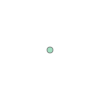

In [130]:
parks.loc[0, 'geometry']

In [131]:
print(parks.loc[0, 'geometry'])

POINT (-86.7619961104642 36.172547470931)


<Axes: >

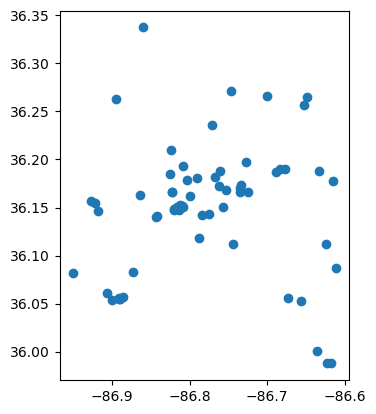

In [132]:
parks.plot()

In [133]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GlobalID         64 non-null     object  
 1   FacilityName     64 non-null     object  
 2   FacilityType     64 non-null     object  
 3   NameAbbrev       39 non-null     object  
 4   Address          64 non-null     object  
 5   City             52 non-null     object  
 6   State            64 non-null     object  
 7   ZipCode          54 non-null     object  
 8   PhoneNumber      64 non-null     object  
 9   Email            5 non-null      object  
 10  Website          64 non-null     object  
 11  Description      51 non-null     object  
 12  YearEstablished  38 non-null     float64 
 13  OBJECTID         64 non-null     int64   
 14  geometry         64 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.6+ KB


## Reading in LIBRARIES

In [135]:
libraries = gpd.read_file('../data/Library_Facilities_-8873344665390112070.geojson')
print(libraries.crs)
libraries.head( )

EPSG:4326


FacilityName                              GLOBALID  \
0        Edgehill  babeb9d5-d990-422a-b9e3-07e258429be0   
1        Bellevue  1591103c-a036-4beb-a66c-bbb465ce0be3   
2        Bordeaux  f3311995-fe56-417b-8804-f56a629eed7a   
3            East  813281c6-800f-40ef-9513-de1588f90405   
4  Edmondson Pike  f2bc8fc4-b502-4255-858e-3269f8a746a2   

                 Address       City ZipCode   PhoneNumber  \
0        1409 12th Ave S  Nashville   37203  615-862-5861   
1           720 Baugh Rd  Nashville   37221  615-862-5854   
2  4000 Clarksville Pike  Nashville   37218  615-862-5856   
3        206 Gallatin Rd  Nashville   37206  615-862-5860   
4    5501 Edmondson Pike  Nashville   37211  615-880-3957   

                  created_user                   created_date  \
0  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
1  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
2  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
3  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
4  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   

              last_edited_user               last_edited_date  ...  \
0  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT  ...   
1  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT  ...   
2  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT  ...   
3  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT  ...   
4  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT  ...   

   PublicComputers Wireless GroupStudy CopyMachines SeedExchange StudioNPL  \
0              Yes      Yes         No          Yes          Yes        No   
1              Yes      Yes        Yes          Yes          Yes       Yes   
2              Yes      Yes        Yes          Yes          Yes       Yes   
3              Yes      Yes         No          Yes           No       Yes   
4              Yes      Yes        Yes          Yes          Yes        No   

  Restrooms BookDrop                                              Notes  \
0       Yes      Yes  Closed on Friday and Sunday.  Call library to ...   
1       Yes      Yes  Call library to confirm hours on holidays and ...   
2       Yes      Yes  Call library to confirm hours on holidays and ...   
3       Yes      Yes  Closed on Friday and Sunday.  Call library to ...   
4       Yes      Yes  CLOSED for renovation until May 2016\nCall lib...   

                     geometry  
0  POINT (-86.78811 36.13949)  
1  POINT (-86.93666 36.06963)  
2  POINT (-86.83800 36.21141)  
3  POINT (-86.75021 36.17896)  
4  POINT (-86.74529 36.04495)  

[5 rows x 44 columns]

In [207]:
# Assuming your GeoDataFrame is called parks

# Create longitude and latitude columns
libraries['long'] = libraries.geometry.x
libraries['lat'] = libraries.geometry.y

In [209]:
libraries

FacilityName                              GLOBALID  \
0         Edgehill  babeb9d5-d990-422a-b9e3-07e258429be0   
1         Bellevue  1591103c-a036-4beb-a66c-bbb465ce0be3   
2         Bordeaux  f3311995-fe56-417b-8804-f56a629eed7a   
3             East  813281c6-800f-40ef-9513-de1588f90405   
4   Edmondson Pike  f2bc8fc4-b502-4255-858e-3269f8a746a2   
5   Goodlettsville  f0207a00-5027-4424-85ab-280182125acf   
6      Green Hills  33b5a870-57e3-4f3d-b7e1-f57c381b3740   
7      Hadley Park  dbada64b-8dfe-44cc-8ee3-66ad158ed299   
8       Hermitage   7220456e-148f-4be0-8493-aa67e28bf259   
9        Inglewood  3d2a0dfb-ad5c-4ed6-90bb-de36348ed3a3   
10           Looby  fcb5582c-bac8-46d9-be74-05a4143a4767   
11         Madison  f7d8fb62-6af5-48c3-9431-2b41afa2d571   
12           North  49259ec6-f1e6-4154-af19-5d89debd889a   
13     Old Hickory  c4cfa2a5-a968-427d-b525-557851907bc5   
14          Pruitt  f5a1bca4-f239-404d-a688-d8060a5788c1   
15   Richland Park  91698450-b3f3-4b00-a30c-ffe9da889f73   
16      Southeast   873c2acc-322c-4548-a60e-23a44e812613   
17   Thompson Lane  6a630f1b-ae19-4c5a-9791-eb93a475e415   
18    Watkins Park  3891f370-bc2c-4293-afb4-b7afd4d22836   
19        Donelson  27450882-4093-44c4-af4f-07765708f717   
20            Main  e7c4ccc3-ee8c-42fb-9612-f7148b81357c   

                      Address            City ZipCode   PhoneNumber  \
0             1409 12th Ave S       Nashville   37203  615-862-5861   
1                720 Baugh Rd       Nashville   37221  615-862-5854   
2       4000 Clarksville Pike       Nashville   37218  615-862-5856   
3             206 Gallatin Rd       Nashville   37206  615-862-5860   
4         5501 Edmondson Pike       Nashville   37211  615-880-3957   
5          205 Rivergate Pkwy  Goodlettsville   37072  615-862-5862   
6             3701 Benham Ave       Nashville   37215  615-862-5863   
7             1039 28th Ave N       Nashville   37208  615-862-5865   
8           3700 James Kay Ln       Hermitage   37076  615-880-3951   
9          4312 Gallatin Road       Nashville   37216  615-862-5866   
10    2301 Rosa L. Parks Blvd       Nashville   37228  615-862-5867   
11        610 Gallatin Pike S         Madison   37115  615-862-5868   
12             1001 Monroe St       Nashville   37208  615-862-5858   
13              1010 Jones St     Old Hickory   37138  615-862-5869   
14  117 Charles E. Davis Blvd       Nashville   37210  615-862-5985   
15         4711 Charlotte Ave       Nashville   37209  615-862-5870   
16   5260 Hickory Hollow Pkwy         Antioch   37013  615-862-5871   
17            380 Thompson Ln       Nashville   37211  615-862-5873   
18             612 17th Ave N       Nashville   37203  615-862-5872   
19            2315 Lebanon Rd       Nashville   37214  615-862-5859   
20              615 Church St       Nashville   37219  615-862-5800   

                   created_user                   created_date  \
0   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
1   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
2   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
3   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
4   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
5   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
6   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
7   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
8   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
9   CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
10  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
11  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
12  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
13  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
14  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   
15  CollaborationAdminNashville  Mon, 16 Dec 2024 19:26:53 GMT   


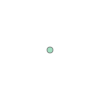

In [136]:
libraries.loc[0, 'geometry']

<Axes: >

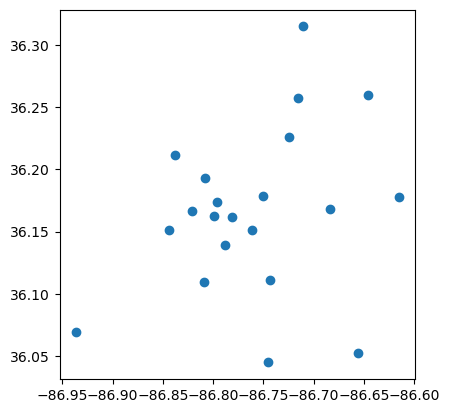

In [137]:
libraries.plot()

## Nashville Map

In [139]:
nash_map = folium.Map(location = [36.1627, -86.7816], zoom_start=12, tiles="cartodb positron")

nash_map

## reading in updated DF that has addresses

In [141]:
address_df = pd.read_excel('../data/schools_with_locations.xlsx')

In [142]:
address_df.shape

(118, 50)

In [143]:
address_df['zip'].value_counts()

zip
37013    15
37211    11
37209     8
37206     7
37214     7
37207     7
37203     6
37115     6
37216     5
37076     5
37210     5
37208     5
37217     4
37072     3
37221     3
37215     3
37205     3
37204     3
37138     3
37218     2
37189     2
37220     2
37027     1
37080     1
37212     1
Name: count, dtype: int64

In [144]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

## mapping everything together

In [146]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

<Axes: >

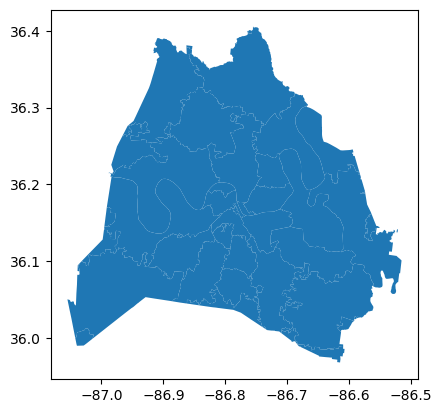

In [147]:
zipcodes.plot()

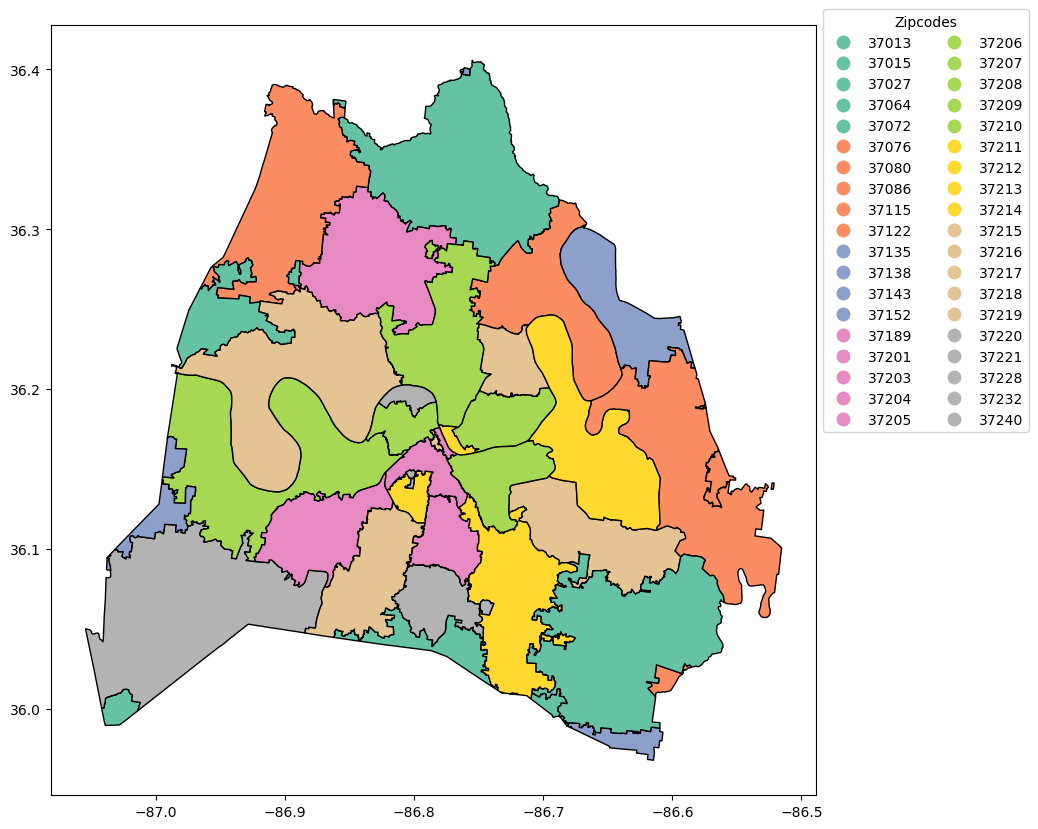

In [241]:
##probably won't use, just want to have for reference

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [149]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [150]:
schools_geo = gpd.GeoDataFrame(address_df, 
                               crs=zipcodes.crs, 
                               geometry = gpd.points_from_xy(address_df.long, address_df.lat))

In [151]:
type(schools_geo)

geopandas.geodataframe.GeoDataFrame

In [152]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [153]:
schools_by_zip = gpd.sjoin(schools_geo, zipcodes, predicate = 'intersects')

In [154]:
schools_by_zip.columns

Index(['school_number', 'school_name', 'wida_student_group', 'wida_exit_denom',
       'wida_n_exit', 'wida_pct_exit', 'wida_growth_standard_denom',
       'wida_n_met_growth_standard', 'wida_pct_met_growth_standard',
       'wida_literacy_avg', 'wida_comp_avg', 'tvaas_overall_comp',
       'tvaas_lit_comp', 'tvaas_num_comp', 'tvaas_litandnum_comp',
       'tvaas_sci_comp', 'tvaas_ss_comp', 'merge_step1', 'letter_grade',
       'merge_step2', 'act_validtests', 'act_part_rate', 'act_avg_eng',
       'act_avg_math', 'act_avg_reading', 'act_avg_sci', 'act_avg_comp',
       'num_scoring_21orhigher', 'pct_scoring_21orhigher',
       'num_scoring_below19', 'pct_scoring_below19', 'merge_step3',
       'hs_grad_cohort_state', 'hs_grad_count_state', 'hs_grad_rate_state',
       'hs_grad_cohort_federal', 'hs_grad_count_federal',
       'hs_grad_rate_federal', 'merge_step4', 'school_type', 'short_address',
       'city', 'zip_left', 'metro_dist', 'schbrd_dist', 'schbrd_mbr', 'long',
       'lat',

In [155]:
schools_by_zip['zip_left'].value_counts()

zip_left
37013    15
37211    11
37209     8
37206     7
37214     7
37207     7
37203     6
37115     6
37216     5
37076     5
37210     5
37208     5
37217     4
37072     3
37221     3
37215     3
37205     3
37204     3
37138     3
37218     2
37189     2
37220     2
37027     1
37080     1
37212     1
Name: count, dtype: int64

In [156]:
schools_by_zip['zip_right'].value_counts()

zip_right
37013    15
37211    11
37207     8
37209     8
37206     7
37214     7
37203     6
37216     5
37076     5
37210     5
37208     5
37115     5
37217     4
37072     3
37221     3
37215     3
37205     3
37204     3
37138     3
37218     2
37189     2
37220     2
37027     1
37080     1
37212     1
Name: count, dtype: int64

In [157]:
print("Total schools:", len(schools_geo))
print("Schools matched to zip:", len(schools_by_zip))
print("Unmatched schools:", len(schools_geo) - len(schools_by_zip))


Total schools: 118
Schools matched to zip: 118
Unmatched schools: 0


In [158]:
matched_index = schools_by_zip.index
unmatched_schools = schools_geo[~schools_geo.index.isin(matched_index)]

print("Unmatched schools:")
print(unmatched_schools)


Unmatched schools:
Empty GeoDataFrame
Columns: [school_number, school_name, wida_student_group, wida_exit_denom, wida_n_exit, wida_pct_exit, wida_growth_standard_denom, wida_n_met_growth_standard, wida_pct_met_growth_standard, wida_literacy_avg, wida_comp_avg, tvaas_overall_comp, tvaas_lit_comp, tvaas_num_comp, tvaas_litandnum_comp, tvaas_sci_comp, tvaas_ss_comp, merge_step1, letter_grade, merge_step2, act_validtests, act_part_rate, act_avg_eng, act_avg_math, act_avg_reading, act_avg_sci, act_avg_comp, num_scoring_21orhigher, pct_scoring_21orhigher, num_scoring_below19, pct_scoring_below19, merge_step3, hs_grad_cohort_state, hs_grad_count_state, hs_grad_rate_state, hs_grad_cohort_federal, hs_grad_count_federal, hs_grad_rate_federal, merge_step4, school_type, short_address, city, zip, metro_dist, schbrd_dist, schbrd_mbr, long, lat, cluster_geo, cluster_name, geometry]
Index: []

[0 rows x 51 columns]


In [159]:
print(schools_geo.crs)
print(zipcodes.crs)

EPSG:4326
EPSG:4326


In [160]:
# Check for duplicates in index of schools_geo after join
schools_by_zip.index.value_counts().value_counts()

count
1    118
Name: count, dtype: int64

In [161]:
schools_by_zip = gpd.sjoin(schools_geo, zipcodes, predicate='within')
schools_by_zip = schools_by_zip[~schools_by_zip.index.duplicated(keep='first')]

In [162]:
schools_by_zip['zip_right'].value_counts()

zip_right
37013    15
37211    11
37207     8
37209     8
37206     7
37214     7
37203     6
37216     5
37076     5
37210     5
37208     5
37115     5
37217     4
37072     3
37221     3
37215     3
37205     3
37204     3
37138     3
37218     2
37189     2
37220     2
37027     1
37080     1
37212     1
Name: count, dtype: int64

In [163]:
schools_by_zip.groupby('zip_right')['school_number'].nunique()

zip_right
37013    15
37027     1
37072     3
37076     5
37080     1
37115     5
37138     3
37189     2
37203     6
37204     3
37205     3
37206     7
37207     8
37208     5
37209     8
37210     4
37211    11
37212     1
37214     7
37215     3
37216     5
37217     4
37218     2
37220     2
37221     3
Name: school_number, dtype: int64

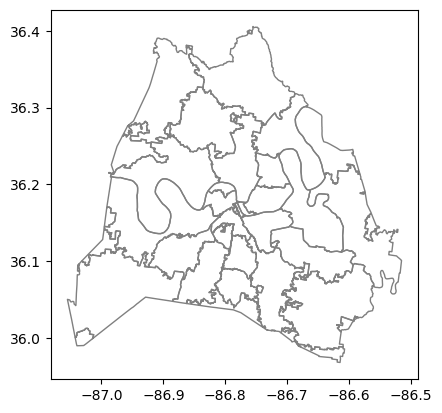

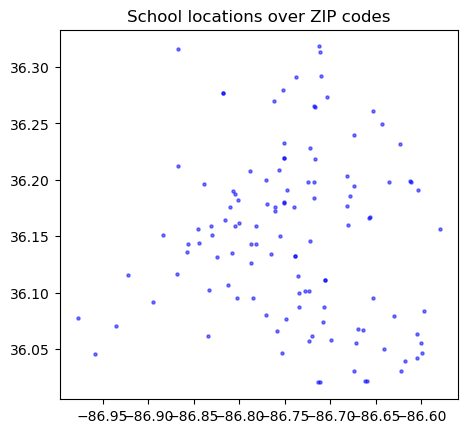

In [164]:
zipcodes.plot(edgecolor='gray', facecolor='none')
schools_geo.plot(color='blue', markersize=5, alpha=0.5)
plt.title("School locations over ZIP codes")
plt.show()

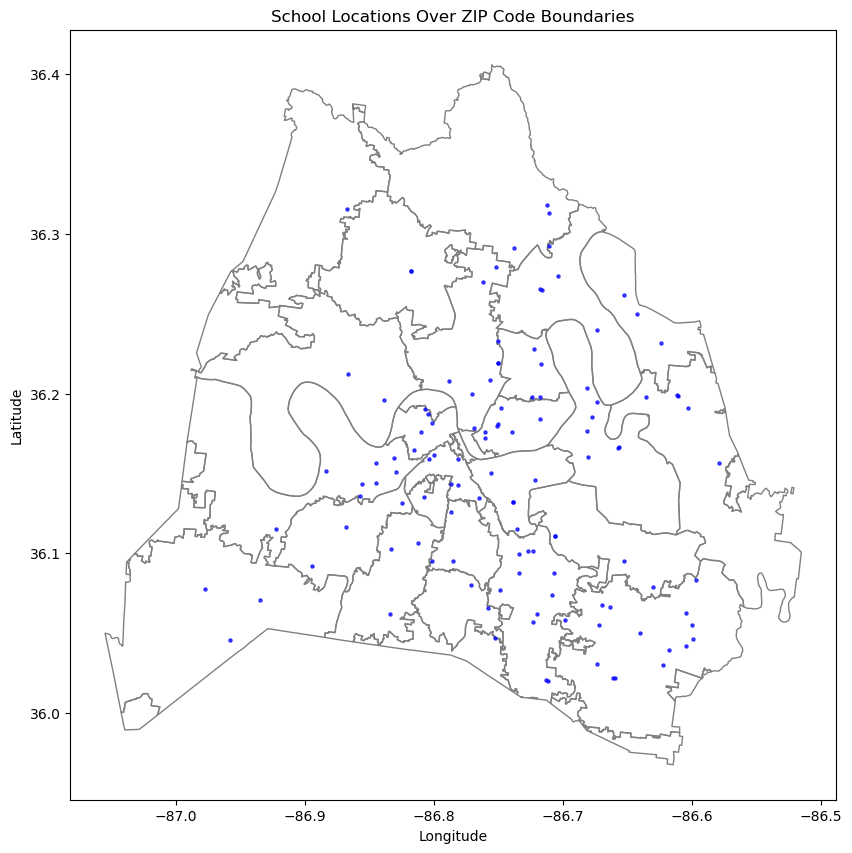

In [165]:
import matplotlib.pyplot as plt

# Create a single plot and get the axes object
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust size if needed

# Plot zipcodes first (background)
zipcodes.plot(ax=ax, edgecolor='gray', facecolor='none')

# Plot schools on the same axes
schools_geo.plot(ax=ax, color='blue', markersize=5, alpha=0.7)

# Add title and show
plt.title("School Locations Over ZIP Code Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## When shown visually, some school locations don't line up perfectly with the python zipcode boundaries. This shows where the school locations are. 

## Trying to create a 1 mile radius around each school -- to later see if there are any libraries or parks within that radius

In [168]:
##need to change CRS because right now it's in DEGREES, but I need to change to distance (meters) to create a radius

schools_geo_updated_espg = schools_geo.to_crs(epsg=3857)  # Web Mercator (units in meters)

In [169]:
mile_buffer = schools_geo_updated_espg.buffer(1609.34)  # 1 mile in meters
schools_geo_updated_espg['buffer_1mile'] = mile_buffer

In [170]:
buffer_1mile_from_school = schools_geo_updated_espg.copy()
buffer_1mile_from_school.set_geometry('buffer_1mile', inplace=True)

In [171]:
# buffer_1mile_from_school = buffer_1mile_from_school.to_crs(epsg=4326)

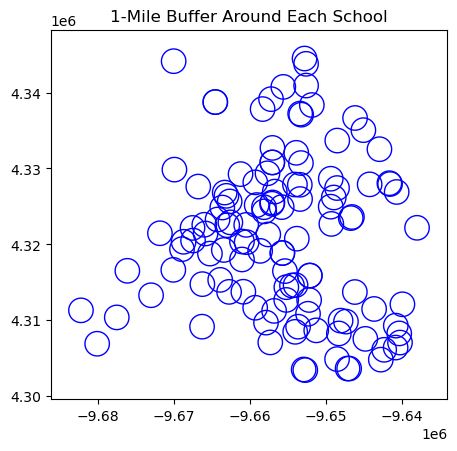

In [172]:
buffer_1mile_from_school.plot(edgecolor='blue', facecolor='none')
plt.title("1-Mile Buffer Around Each School")
plt.show()

In [173]:
gpd.overlay(buffer_1mile_from_school, schools_geo_updated_espg, how='intersection')

Empty GeoDataFrame
Columns: [school_number_1, school_name_1, wida_student_group_1, wida_exit_denom_1, wida_n_exit_1, wida_pct_exit_1, wida_growth_standard_denom_1, wida_n_met_growth_standard_1, wida_pct_met_growth_standard_1, wida_literacy_avg_1, wida_comp_avg_1, tvaas_overall_comp_1, tvaas_lit_comp_1, tvaas_num_comp_1, tvaas_litandnum_comp_1, tvaas_sci_comp_1, tvaas_ss_comp_1, merge_step1_1, letter_grade_1, merge_step2_1, act_validtests_1, act_part_rate_1, act_avg_eng_1, act_avg_math_1, act_avg_reading_1, act_avg_sci_1, act_avg_comp_1, num_scoring_21orhigher_1, pct_scoring_21orhigher_1, num_scoring_below19_1, pct_scoring_below19_1, merge_step3_1, hs_grad_cohort_state_1, hs_grad_count_state_1, hs_grad_rate_state_1, hs_grad_cohort_federal_1, hs_grad_count_federal_1, hs_grad_rate_federal_1, merge_step4_1, school_type_1, short_address_1, city_1, zip_1, metro_dist_1, schbrd_dist_1, schbrd_mbr_1, long_1, lat_1, cluster_geo_1, cluster_name_1, geometry, school_number_2, school_name_2, wida_student_group_2, wida_exit_denom_2, wida_n_exit_2, wida_pct_exit_2, wida_growth_standard_denom_2, wida_n_met_growth_standard_2, wida_pct_met_growth_standard_2, wida_literacy_avg_2, wida_comp_avg_2, tvaas_overall_comp_2, tvaas_lit_comp_2, tvaas_num_comp_2, tvaas_litandnum_comp_2, tvaas_sci_comp_2, tvaas_ss_comp_2, merge_step1_2, letter_grade_2, merge_step2_2, act_validtests_2, act_part_rate_2, act_avg_eng_2, act_avg_math_2, act_avg_reading_2, act_avg_sci_2, act_avg_comp_2, num_scoring_21orhigher_2, pct_scoring_21orhigher_2, num_scoring_below19_2, pct_scoring_below19_2, merge_step3_2, hs_grad_cohort_state_2, hs_grad_count_state_2, hs_grad_rate_state_2, hs_grad_cohort_federal_2, hs_grad_count_federal_2, hs_grad_rate_federal_2, merge_step4_2, school_type_2, short_address_2, city_2, zip_2, metro_dist_2, schbrd_dist_2, schbrd_mbr_2, long_2, lat_2, cluster_geo_2, ...]
Index: []

[0 rows x 102 columns]

In [174]:
print(buffer_1mile_from_school.crs)
print(schools_geo_updated_espg.crs)


EPSG:3857
EPSG:3857


In [175]:
print(buffer_1mile_from_school.geom_type.unique())
print(schools_geo_updated_espg.geom_type.unique())

['Polygon']
['Point']


In [176]:
# Join: Which schools (points) fall inside which 1-mile buffer polygon?
schools_in_buffer = gpd.sjoin(schools_geo_updated_espg, buffer_1mile_from_school, predicate='within')

print(schools_in_buffer)

     school_number_left              school_name_left wida_student_group_left  \
0                     1       A. Z. Kelley Elementary            All Students   
0                     1       A. Z. Kelley Elementary            All Students   
1                     5         Alex Green Elementary            All Students   
1                     5         Alex Green Elementary            All Students   
2                    10              Amqui Elementary            All Students   
..                  ...                           ...                     ...   
115                 555               Pearl-Cohn High            All Students   
116                 620  Stratford STEM Magnet School            All Students   
116                 620  Stratford STEM Magnet School            All Students   
117                 704             Whites Creek High            All Students   
117                 704             Whites Creek High            All Students   

     wida_exit_denom_left w

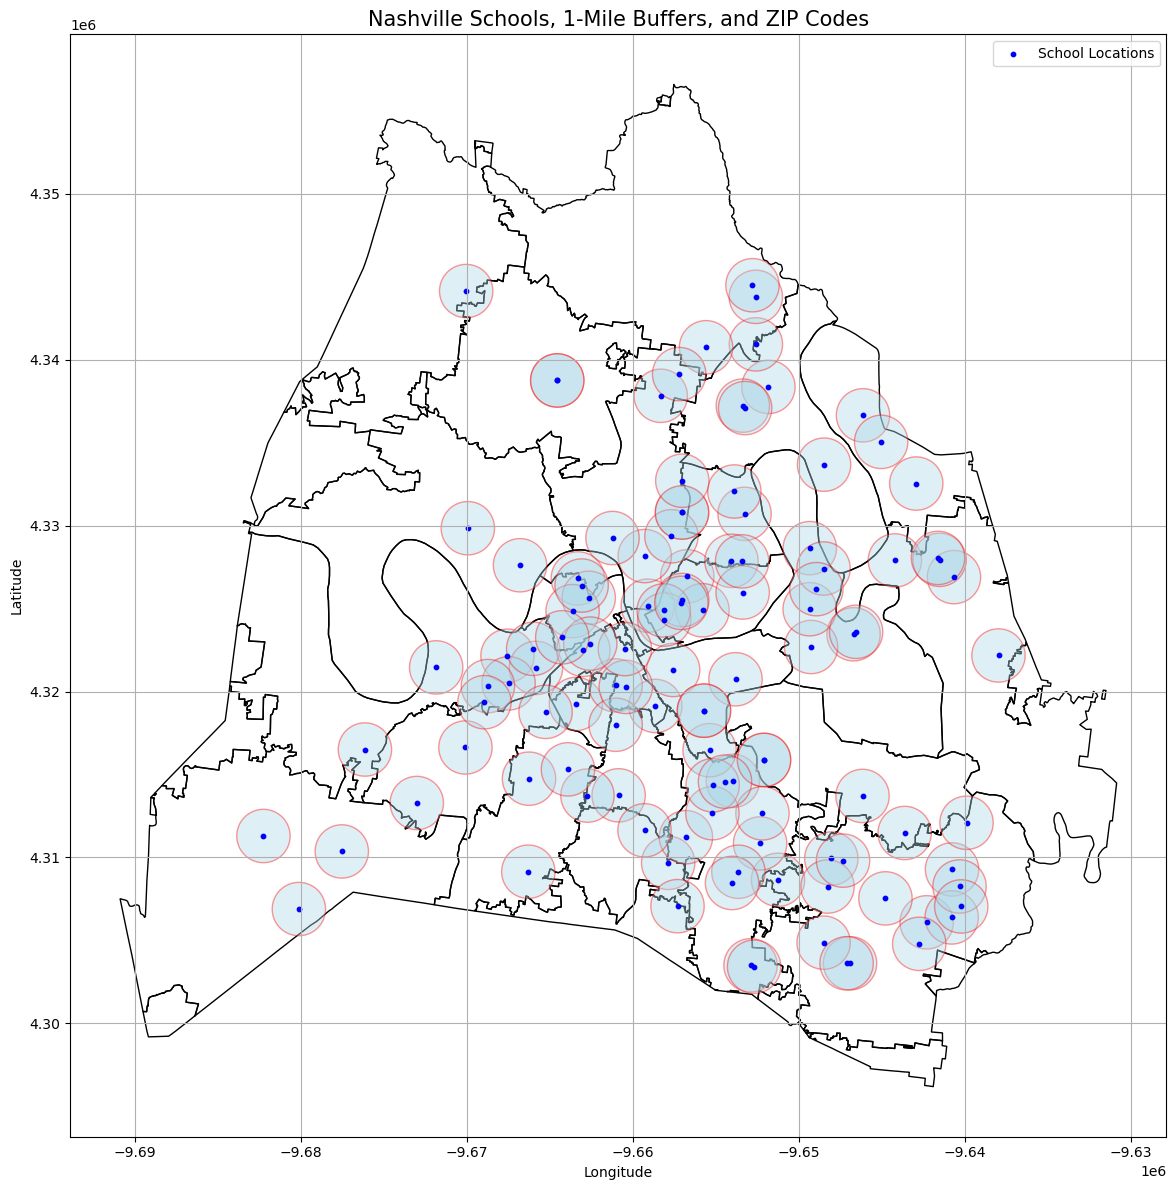

In [177]:
import matplotlib.pyplot as plt

# OPTIONAL: make sure all are same CRS 
zipcodes_proj = zipcodes.to_crs(epsg=3857)
schools_proj = schools_geo.to_crs(epsg=3857)
buffers_proj = buffer_1mile_from_school.to_crs(epsg=3857)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot ZIP code boundaries (base layer)
zipcodes_proj.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='ZIP Code Boundaries')

# Plot the 1-mile buffer areas
buffers_proj.plot(ax=ax, facecolor='lightblue', edgecolor='red', alpha=0.4, label='1-Mile Radius')

# Plot school locations
schools_proj.plot(ax=ax, color='blue', markersize=10, label='School Locations')

# Customize and display
plt.title("Nashville Schools, 1-Mile Buffers, and ZIP Codes", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## adding PARKS to the map

In [179]:
parks_plot = parks.to_crs(epsg=3857)

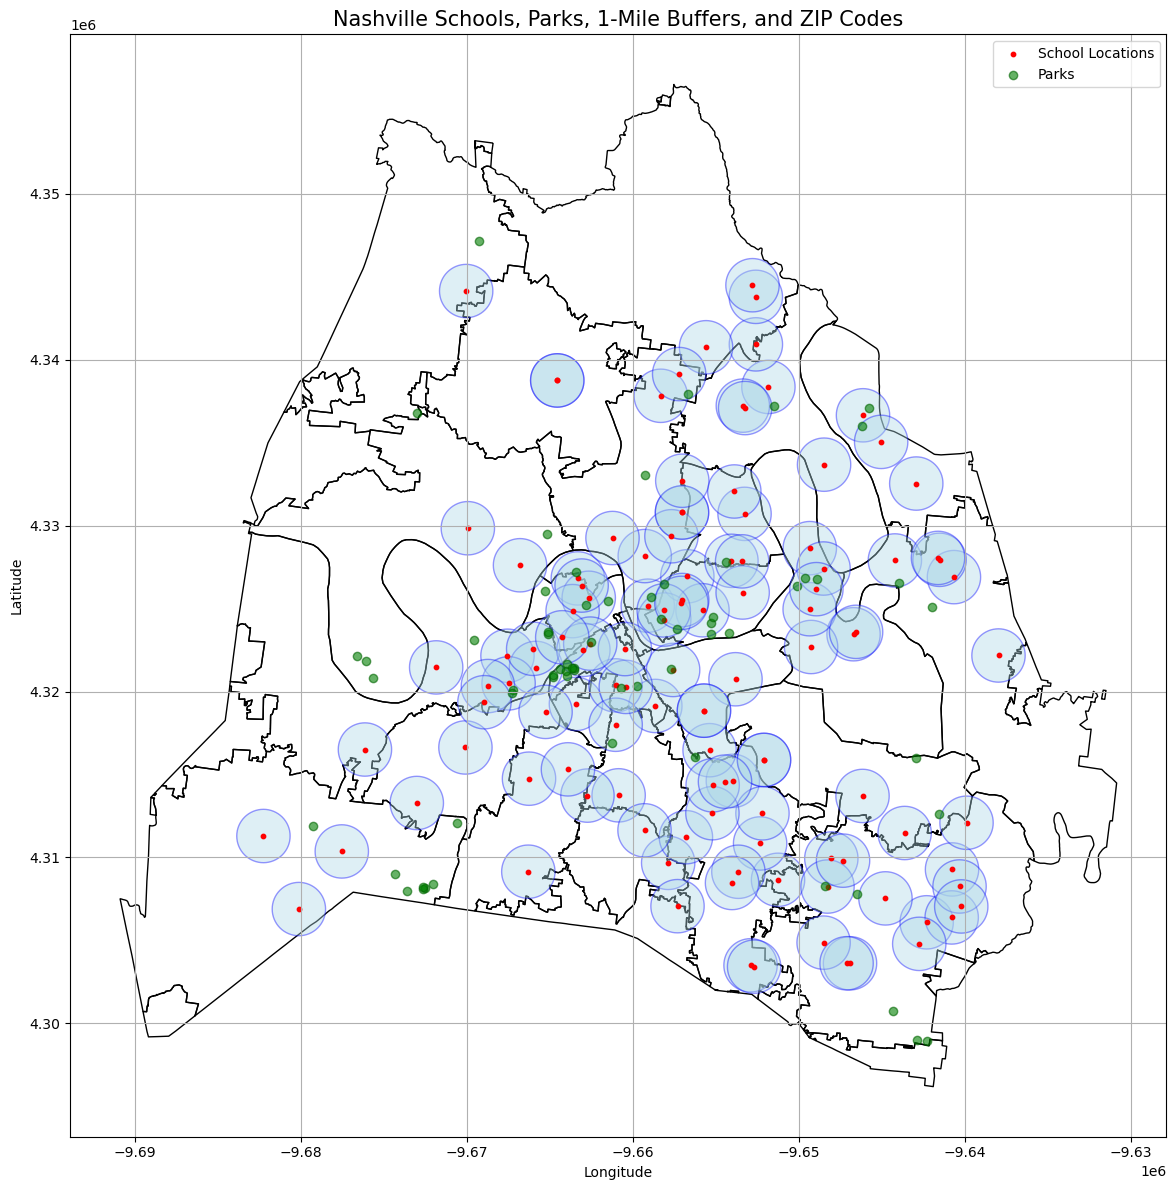

In [180]:
# Plot 
fig, ax = plt.subplots(figsize=(12, 12))

# ZIP codes
zipcodes_proj.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='ZIP Code Boundaries')

# 1 mile buffer around schools
buffers_proj.plot(ax=ax, facecolor='lightblue', edgecolor='blue', alpha=0.4, label='1-Mile Radius')

# Schools points
schools_proj.plot(ax=ax, color='red', markersize=10, label='School Locations')

# Parks points
parks_plot.plot(ax=ax, color='green', alpha=0.6, edgecolor='darkgreen', label='Parks')

# Title, labels, colors, etc
plt.title("Nashville Schools, Parks, 1-Mile Buffers, and ZIP Codes", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## adding LIBRARIES to the map

In [182]:
libs_plot = libraries.to_crs(epsg=3857)

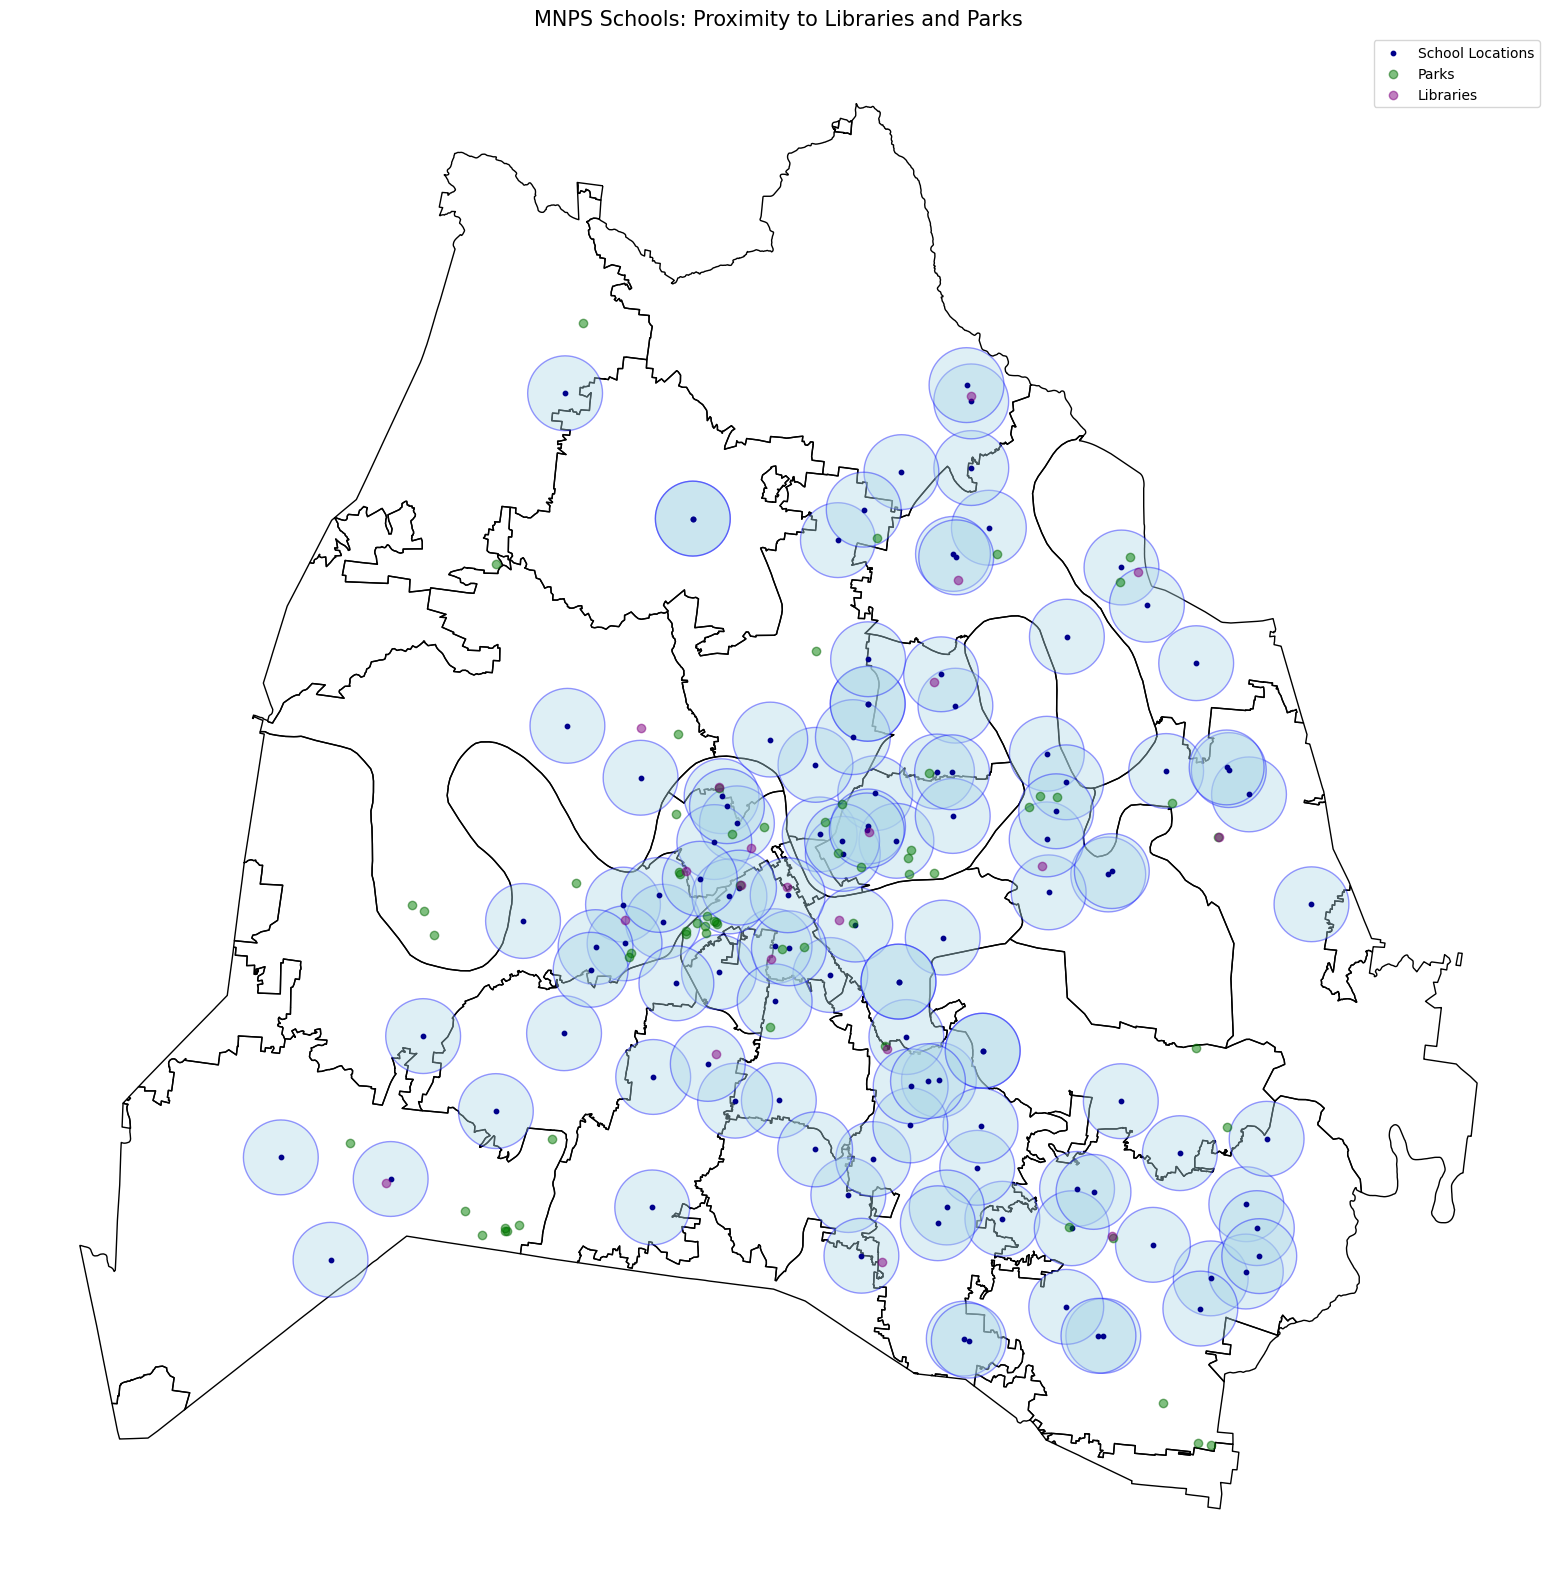

In [183]:
# Plot 
fig, ax = plt.subplots(figsize=(16, 16))

# ZIP codes
zipcodes_proj.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='ZIP Code Boundaries')

# 1 mile buffer around schools
buffers_proj.plot(ax=ax, facecolor='lightblue', edgecolor='blue', alpha=0.4, label='1-Mile Radius')

# Schools points
schools_proj.plot(ax=ax, color='darkblue', markersize=10, label='School Locations')

# Parks points
parks_plot.plot(ax=ax, color='green', alpha=0.5, edgecolor='darkgreen', label='Parks')

# Libraries points
libs_plot.plot(ax=ax, color='purple', alpha=0.5, edgecolor='purple', label='Libraries')

ax.axis('off')

# Title, labels, colors, etc
plt.title("MNPS Schools: Proximity to Libraries and Parks", fontsize=15)
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Using FOLIUM

In [185]:
##adding zipcode lines

folium.GeoJson(
    zipcodes,
    name='ZIP Code Boundaries',
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': .2
    }
).add_to(nash_map)

In [186]:
##adding school locations
for idx, row in address_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['school_name'],
    ).add_to(nash_map)

nash_map

In [187]:
print(buffers_proj.geom_type.value_counts())

Polygon    118
Name: count, dtype: int64


In [188]:
#zipcodes_new = zipcodes.to_crs(epsg=4326)
schools_new = schools_geo.to_crs(epsg=4326)
buffers_new = buffer_1mile_from_school.buffer(1609.34) #convert 1 mile to meters
libraries_new=libraries.to_crs(epsg=4326)
parks_new=parks.to_crs(epsg=4326)

In [189]:
#folium.GeoJson(
   # zipcodes_new,
    #name='ZIP Code Boundaries',
    #style_function=lambda feature: {
        #'fillColor': 'transparent',
        #'color': 'black',
        #'weight': 1,
   # }
#).add_to(nash_map)

In [190]:
for _, row in schools_new.iterrows():
    folium.CircleMarker(
    location=[row.geometry.y, row.geometry.x],
    radius=5,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.8,
    popup=folium.Popup(str(row['school_name']), max_width=100),
    tooltip=row['school_name']
).add_to(nash_map)

In [191]:
libraries.geom_type.unique()

array(['Point'], dtype=object)

In [192]:
parks.geom_type.unique()

array(['Point'], dtype=object)

In [193]:
for _, row in schools_new.iterrows():
    popup_html = f"""
    <div style="font-size:12px; max-width:120px;">
        {row['school_name']}
    </div>
    """
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=1.0,
        opacity= 1.0,
        popup=folium.Popup(popup_html, max_width=120),  #popup size
        tooltip=row['school_name']  # popup label
    ).add_to(nash_map)


In [194]:
for _, row in parks_new.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=1.0,
        opacity=1.0,
        popup=folium.Popup(row.get('FacilityName'), max_width=200)
    ).add_to(nash_map)

In [195]:
for _, row in libraries_new.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=1.0,
        opacity=1.0,
        popup=folium.Popup(row.get('FacilityName'), max_width=200)
    ).add_to(nash_map)

In [196]:
buffers_new.geom_type.value_counts()

Polygon    118
Name: count, dtype: int64

In [197]:
#folium.GeoJson(
    #buffers_new,
    #name='1-Mile Buffers',
    #style_function=lambda feature: {
        #'fillColor': 'lightblue',
        #'color': 'blue',
        #'weight': .5,
        #'fillOpacity': 0.1,
        #'opacity': 0.1
   # }
#).add_to(nash_map)

In [198]:
nash_map

## trying to find the distance between schools and resources - could NOT get this to work with folium

In [244]:
!pip install geopy

## Checking to see if school is within 1 mile from LIBRARIES

In [219]:
from geopy.distance import geodesic

def is_school_within_1mile_from_lib(school_row, libraries_df):
    school_loc = (school_row['lat'], school_row['long'])
    for _, lib_row in libraries_df.iterrows():
        lib_loc = (lib_row['lat'], lib_row['long'])
        if geodesic(school_loc, lib_loc).miles <= 1:
            return 'yes'
    return 'no'

address_df['within_1mile_library'] = address_df.apply(
    is_school_within_1mile_from_lib, 
    libraries_df=libraries, 
    axis=1
)

In [221]:
address_df

school_number                   school_name wida_student_group  \
0                1       A. Z. Kelley Elementary       All Students   
1                5         Alex Green Elementary       All Students   
2               10              Amqui Elementary       All Students   
3               15     Andrew Jackson Elementary       All Students   
4               45          Bellshire Elementary       All Students   
..             ...                           ...                ...   
113            470                 McGavock High       All Students   
114            512  Nashville School Of The Arts       All Students   
115            555               Pearl-Cohn High       All Students   
116            620  Stratford STEM Magnet School       All Students   
117            704             Whites Creek High       All Students   

     wida_exit_denom wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
0              304.0          **            **                       189.0   
1               70.0           5           7.1                        47.0   
2              195.0          16           8.2                       124.0   
3               45.0          **            **                        32.0   
4               71.0          **            **                        40.0   
..               ...         ...           ...                         ...   
113            292.0          **            **                       233.0   
114              4.0           *             *                         3.0   
115             27.0           4          14.8                        21.0   
116             99.0           8           8.1                        85.0   
117             50.0           3             6                        40.0   

    wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
0                           80                         42.3               2.6   
1                           20                         42.6               2.8   
2                           65                         52.4               2.7   
3                           16                           50               2.8   
4                           17                         42.5               2.4   
..                         ...                          ...               ...   
113                         37                         15.9               2.7   
114                          *                            *                 *   
115                          5                         23.8                 3   
116                         25                         29.4               2.8   
117                         16                           40               3.1   

     ...          city    zip  metro_dist  schbrd_dist  \
0    ...       Antioch  37013          33            6   
1    ...  Whites Creek  37189           1            1   
2    ...       Madison  37115           9            3   
3    ...   Old Hickory  37138          11            4   
4    ...     Nashville  37207           3            1   
..   ...           ...    ...         ...          ...   
113  ...     Nashville  37214          15            4   
114  ...     Nashville  37210          16            5   
115  ...     Nashville  37208          21            5   
116  ...     Nashville  37216           7            3   
117  ...  Whites Creek  37189           1            1   

                  schbrd_mbr       long        lat   cluster_geo  \
0               Cheryl Mayes -86.659652  36.021787    Cane Ridge   
1              Robert Taylor -86.818161  36.276610  Whites Creek   
2                 Zach Young -86.703837  36.273773  Hunters Lane   
3    Berthena Nabaa-Mckinney -86.623780  36.231592      McGavock   
4              Robert Taylor -86.762129  36.269911  Hunters Lane   
..                       ...        ...        ...           ...   
113  Berthena Nabaa-Mckinney -86.677854  36.185450      McGavock   
1

## checking with granbery b/c it's right next to a LIBRARY but it wasn't working earlier when I used the folium method

In [225]:
granbery_check = address_df[address_df['school_name'] == 'Granbery Elementary']
print(granbery_check)


    school_number          school_name wida_student_group  wida_exit_denom  \
28            290  Granbery Elementary       All Students            137.0   

   wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
28          14          10.2                        93.0   

   wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
28                         53                           57               2.8   

    ...       city    zip  metro_dist  schbrd_dist         schbrd_mbr  \
28  ...  Brentwood  37027          26            2  Rachel Anne Elrod   

         long        lat cluster_geo cluster_name within_1mile_library  
28 -86.753051  36.046797     Overton      Overton                  yes  

[1 rows x 51 columns]


## checking to see if school is within 1 mile from a PARK 

In [234]:
from geopy.distance import geodesic

def is_school_within_1mile_from_park(school_row, parks_df):
    school_loc = (school_row['lat'], school_row['long'])
    for _, parks_row in parks_df.iterrows():
        park_loc = (parks_row['lat'], parks_row['long'])
        if geodesic(school_loc, park_loc).miles <= 1:
            return 'yes'
    return 'no'

address_df['within_1mile_park'] = address_df.apply(
    is_school_within_1mile_from_park, 
    parks_df=parks, 
    axis=1
)

## checking with Eakin b/c it's right next to a park

In [238]:
eakin_check = address_df[address_df['school_name'] == 'Eakin Elementary']
print(eakin_check)

    school_number       school_name wida_student_group  wida_exit_denom  \
18            195  Eakin Elementary       All Students             47.0   

   wida_n_exit wida_pct_exit  wida_growth_standard_denom  \
18           3           6.4                        18.0   

   wida_n_met_growth_standard wida_pct_met_growth_standard wida_literacy_avg  \
18                          8                         44.4               2.6   

    ...    zip  metro_dist  schbrd_dist         schbrd_mbr       long  \
18  ...  37212          18            8  Erin O’Hara Block -86.808064   

          lat  cluster_geo cluster_name within_1mile_library within_1mile_park  
18  36.135273    Hillsboro    Hillsboro                   no               yes  

[1 rows x 52 columns]


## exporting updated libraries and parks files as CSV b/c they have new columns --> now I can use in PowerBi

In [249]:
parks.to_excel('parks_updated.xlsx', index=False)

In [251]:
libraries.to_excel('libraries_updated.xlsx', index=False)

## exporting updated merged file so I can start on PowerBI

In [254]:
address_df.to_excel('merged_updated_1009.xlsx', index=False)